# ![seaborn](../images/logo-seaborn-wide-lightbg.svg)

[Seaborn web oficial](https://seaborn.pydata.org/)

# Introducción

seaborn es una librería de visualización de datos para Python desarrollada sobre matplotlib. Ofrece una interfaz de alto nivel para la creación de atractivas gráficas. Además, está íntimamente integrada con las estructuras de datos de pandas, lo que permite utilizar el nombre de los DataFrames y campos directamente como argumentos de las funciones de visualización.

seaborn tiene como objetivo convertir la visualización en una parte central de la exploración y comprensión de los datos, generando atractivas gráficas con sencillas funciones que ofrecen una interfaz semejante, facilitando el paso de unas funciones a otras.

La documentación oficial está disponible en el sitio web oficial de seaborn.

Esta librería se importa habitualmente con el alias sns.
* `import seaborn as sns`

Para poder hacer uso de las funciones ofrecidas por seaborn deberás importar previamente la librería con la instrucción anterior. Aunque las capturas de pantalla incluidas en este tutorial no lo muestren, la importación de seaborn se realiza en la primera celda del notebook Jupyter:

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

In [2]:
np.random.seed(18)
warnings.filterwarnings("ignore")
sns.set()

Junto a seaborn se importan también las librerías **matplotlib** (pues, en ocasiones, hay que recurrir a ella para acceder a funcionalidad no ofrecida por seaborn), **pandas** y **NumPy** (en algunos ejemplos crearemos estructuras de datos basadas en estas librerías) y la librería warnings para ocultar ciertos mensajes de aviso que genera seaborn (al respecto de futuros cambios de funcionalidad).

En el código mostrado en la imagen anterior (celda In [3]) se inicializa el generador de números aleatorios de **NumPy**, se activa la ocultación de los avisos y se **fija el estilo gráfico de seaborn**.

# Funcionalidad de seaborn

seaborn ofrece varias características destacadas:

* Funciones con una API estandarizada que limita la necesidad de tener que memorizar conjuntos de parámetros diferentes en función del gráfico deseado:

In [3]:
# Carga de datos de ejemplo
df = sns.load_dataset ('tips')

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


* Gráficas visualmente atractivas sin necesidad de realizar complicados ajustes

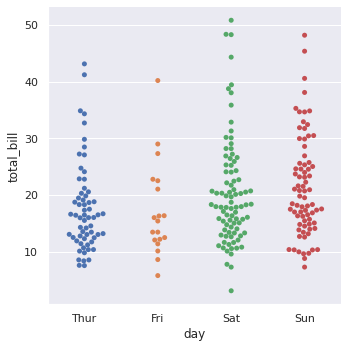

In [5]:
sns.catplot(x = "day", y = "total_bill", kind = "swarm", data = df)

* Una API orientada a conjuntos de datos para examinar la relación entre múltiples variables.

# Funciones a nivel de figura y de ejes

En seaborn hay dos tipos de funciones gráficas: funciones a nivel de figura y funciones a nivel de ejes. Las primeras son funciones de alto nivel que gestionan la figura y el conjunto de ejes que las contiene, así como la leyenda. Funciones de este tipo son [seaborn.relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html) y [seaborn.catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html), por ejemplo. Pero estas funciones acaban ejecutando una función a nivel de ejes. ¿Cuál? La indicada por el parámetro **kind**. Veamos, por ejemplo, la siguiente función:

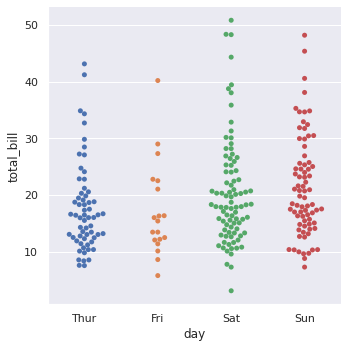

In [7]:

sns.catplot(x = "day", y = "total_bill", kind = "swarm", data = df)

Se trata de una función a nivel de figura que, tras crear la figura y el conjunto de ejes, llamará a la función a nivel de ejes seaborn.swarmplot (cosa que sabemos por el valor del parámetro kind: "swarm") pasándole los valores de x, y y data indicados. Por ejemplo, si, en lugar de la anterior instrucción, llamamos directamente a [seaborn.swarmplot](https://seaborn.pydata.org/generated/seaborn.swarmplot.html).

..el resultado sería el siguiente:

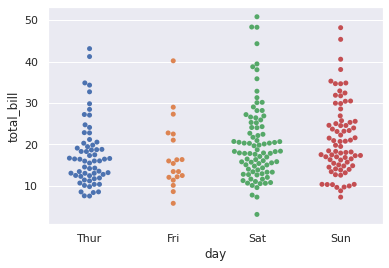

In [9]:
sns.swarmplot(x = "day", y = "total_bill", data = df);

..semejante al anterior, pero quedando en nuestras manos el control de la figura (incluyendo su tamaño) y conjunto de ejes.

Las funciones a nivel de ejes, como la mencionada seaborn.swarmplot, son funciones de más bajo nivel que se crean en un conjunto concreto de exes (que puede ser indicado como argumento) y que, por lo tanto, no influye en el resto de la figura. 

Otro ejemplo: la función a nivel de figura [seaborn.relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html) puede ejecutar la función [seaborn.scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) (si el parámetro kind toma el valor "scatter") o la función [seaborn.lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html) (si el parámetro kind toma el valor "line"). Veremos estas funciones en breve.

A la hora de crear visualizaciones podemos utilizar tanto un tipo como el otro. Tan solo deberemos saber que no podremos controlar la figura ni el eje de las funciones a nivel de figura, cosa que sí podremos hacer con las funciones a nivel de eje. Posiblemente las funciones a nivel de figura son más apropiadas para análisis exploratorio, pues no tenemos que molestarnos en crear la figura, la leyenda, etc.

Podemos distinguir unas funciones de otras viendo si admiten el parámetro **ax**: Si lo admiten, se trata de funciones a nivel de ejes. Otra forma de saberlo es viendo el tipo del resultado que devuelven: si se trata de un objeto tipo "axes" de matplotlib, se trata de una función a nivel de ejes. Si, por el contrario, se trata de un objeto "FacetGrid", es una función a nivel de figura.

# Datasets
seaborn incluye un interesante conjunto de datasets que pueden ser utilizados para probar las distintas visualizaciones. La función disponible para la carga de estos conjuntos de datos es [seaborn.load_dataset](https://seaborn.pydata.org/generated/seaborn.load_dataset.html), devolviendo un dataframe pandas. A lo largo de este tutorial se utilizarán algunos de estos datasets:

* **flights:**

In [13]:
flights = sns.load_dataset("flights")
flights.sample(5)

,year,month,passengers
40,1952,May,183
18,1950,Jul,170
46,1952,Nov,172
60,1954,Jan,204
66,1954,Jul,302


Dataset con información sobre pasajeros transportados en avión por mes entre 1949 y 1960. Las cifras de pasajeros probablemente hacen referencia a "miles" de pasajeros (no está documentado).

* **titanic:**

In [16]:
titanic = sns.load_dataset("titanic")
titanic.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
493,0,1,male,71.0,0,0,49.5042,C,First,man,True,NaN,Cherbourg,no,True
329,1,1,female,16.0,0,1,57.9792,C,First,woman,False,B,Cherbourg,yes,False
346,1,2,female,40.0,0,0,13.0000,S,Second,woman,False,NaN,Southampton,yes,True
684,0,2,male,60.0,1,1,39.0000,S,Second,man,True,NaN,Southampton,no,False
16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False


Famoso conjunto de datos con información sobre los pasajeros del último viaje del Titanic, con información sobre quiénes sobrevivieron, su edad, sexo, clase en la que viajaban...

* **iris:**

In [15]:
iris = sns.load_dataset("iris")
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
92,5.8,2.6,4.0,1.2,versicolor
32,5.2,4.1,1.5,0.1,setosa
77,6.7,3.0,5.0,1.7,versicolor
55,5.7,2.8,4.5,1.3,versicolor


Otro de los clásicos, con información de la longitud y ancho de pétalos y sépalos de 150 flores Iris de tres especies relacionadas.

* **tips:**

In [4]:
tips = sns.load_dataset("tips")
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
91,22.49,3.50,Male,No,Fri,Dinner,2
181,23.33,5.65,Male,Yes,Sun,Dinner,2
125,29.80,4.20,Female,No,Thur,Lunch,6
58,11.24,1.76,Male,Yes,Sat,Dinner,2
148,9.78,1.73,Male,No,Thur,Lunch,2


En este conjunto de datos hay información sobre propinas dejadas en un restaurante, con información sobre el día en el que se produjo, si fue en el almuerzo o la cena, el número de comensales, el sexo de la persona que dejó la propina, si era fumador o no...

[En este enlace](https://github.com/mwaskom/seaborn-data) puedes descargar los ficheros en formato CSV contenidos en todos los datasets de seaborn.

# Clasificación de funciones

Vamos a dividir las funciones de visualización de seaborn en las siguientes categorías:

* **Distribuciones:** Gráficas que muestran la distribución de una, dos o más variables.
    * Distribuciones univariadas
    * Distribuciones bivariadas
    * Distribuciones de varias variables
* **Relaciones entre variables cuantitativas:** Diagramas de dispersión y de líneas, involucrando dos variables cuantitativas.
    * Diagramas de dispersión
    * Gráficos de líneas
    * Gráficos de líneas con agregación
* **Relaciones entre variables cuantitativas y cualitativas:** Diagramas que muestran la relación entre variables cuando una o más son de tipo cualitativo o categórico.
    * Diagramas de dispersión categóricos
    * Diagramas de distribución categórica
    * Gráficas de estimación categórica
* **Modelos estadísticos:** Generación y dibujo de sencillos modelos lineales sobre nuestros datos.
    * Regresiones lineales
    * Regresiones polinomiales
    * Regresiones logísticas
    *Regresiones en otros contextos
* **Mapas de calor**

# Distribuciones
Una de las primeras cosas que normalmente queremos hacer ante un conjunto de datos es analizar la distribución de sus características, tanto consideradas independientemente como por parejas. Estas visualizaciones nos van a dar una primera visión general del perfil de nuestros datos: si son simétricos, si están muy repartidos, si tienen outliers...

En este primer bloque de funciones vamos a revisar las herramientas que ofrece seaborn con este objetivo.

## Distribuciones univariadas

En este tipo de gráficas estamos analizando la distribución de una variable, es decir, como se reparten los valores a lo largo del dominio de ésta. La mejor forma de mostrar la distribución de una variable es utilizar la función [seaborn.distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html). Por defecto, esta función muestra un histograma y una estimación de densidad Kernel:

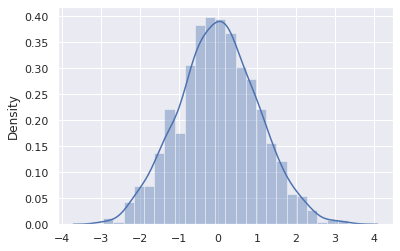

In [17]:
y = np.random.normal(size = 1000)
sns.distplot(y);

Ésta no es, en todo caso, la única función que podemos usar para mostrar la distribución de una variable, pues también disponemos de las funciones [seaborn.rugplot](https://seaborn.pydata.org/generated/seaborn.rugplot.html) y [seaborn.kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html). Revisemos las tres opciones.

### Rug plot
La primera opción que tenemos es la llamada en inglés "rug plot" (¿gráfica de alfombrilla?). Este tipo de gráficas muestra la distribución de una variable con marcas representando los valores en un único eje. Desde cierto punto de vista son semejantes a los histogramas con bins de un ancho igual a cero (de forma que cada valor tenga su propio bin y éstos tengan todos una misma altura). También puede ser comparado a un gráfico de dispersión de una sola variable.

En seaborn disponemos de la función [seaborn.rugplot](https://seaborn.pydata.org/generated/seaborn.rugplot.html) con este fin:

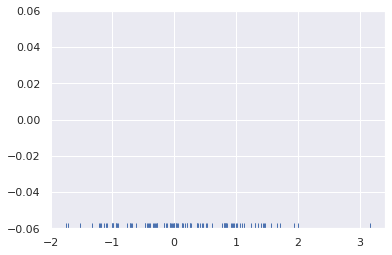

In [18]:
y = np.random.normal(size = 100)
sns.rugplot(y);

El único argumento obligatorio es el array conteniendo los puntos. Es posible controlar la altura de las marcas y el eje en el que se va a mostrar con los parámetros **height** y **axis**, respectivamente. En el siguiente ejemplo se personalizan ambos:

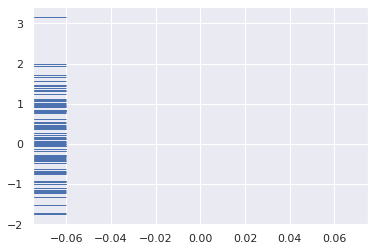

In [19]:
sns.rugplot(y, height = 0.1, axis = "y");

Ésta es una función a nivel de ejes, lo que implica que puede ser mostrada en un conjunto de ejes cualquiera.

## Histogramas
Podemos mostrar un histograma usando la función [seaborn.distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) si ocultamos la estimación de densidad Kernel, cosa que podemos conseguir con el parámetro kde:

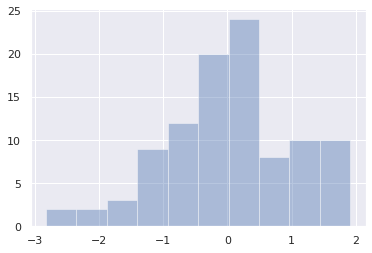

In [20]:
y = np.random.normal(size = 100)
sns.distplot(y, kde = False);

Podemos incluir el "rug" también en el histograma, utilizando el parámetro homónimo:

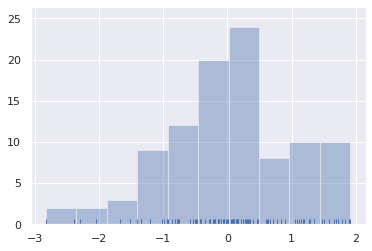

In [21]:
sns.distplot(y, kde = False, rug = True);

Por último, el número de bins se controla con el parámetro del mismo nombre:

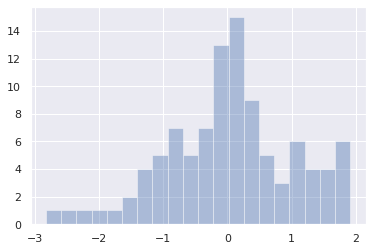

In [22]:
sns.distplot(y, kde = False, bins = 20);

## Estimación de densidad kernel
La estimación de densidad kernel (KDE) es menos usada que el histograma, pero puede ser una útil herramienta para mostrar la distribución de una variable. Al igual que aquel, los KDE codifican la densidad de observaciones en un eje mostrando una altura proporcional en el otro eje, pero los KDE pueden ser dotados de propiedades como la suavidad o continuidad.

Para construir el KDE se considera una función no negativa -el kernel- y un parámetro de suavizado denominado bandwidth. Cuando el kernel es una función gaussiana, cada observación es sustituida por una curva de este tipo centrada en dicho valor. A continuación, se suman las curvas para obtener el valor de la densidad en cada punto. Por último, la curva resultante se normaliza para que el área bajo ella sea igual a 1.

Usando la función [seaborn.distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) basta con ocultar el histograma -lo que controlamos con el parámetro hist- para obtener el KDE:

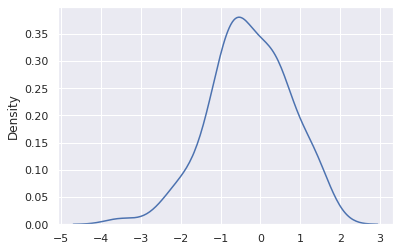

In [23]:
y = np.random.normal(size = 100)
sns.distplot(y, hist = False);

También aquí tenemos a disposición el "rug":

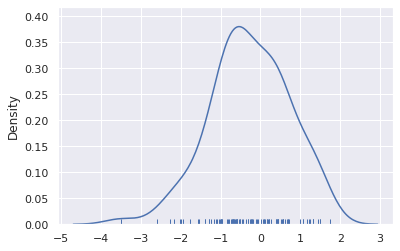

In [24]:
sns.distplot(y, hist = False, rug = True);

## kde plot
También podemos mostrar el KDE utilizando la función seaborn.kdeplot. Esta función permite mucho más control sobre la gráfica resultante que la función seaborn.distplot. Si pasamos como primer argumento el conjunto de valores y calculado en la sección anterior, obtenemos exactamente la misma gráfica:

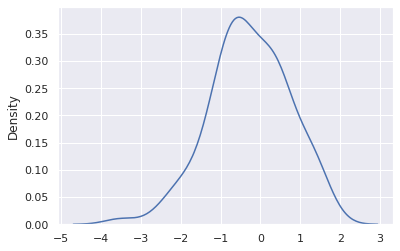

In [25]:
sns.kdeplot(y);

Con el parámetro **bw** ("bandwidth") podemos controlar el grado de ajuste de la curva a los datos. Por ejemplo:

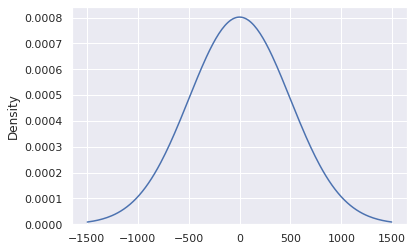

In [28]:
sns.kdeplot(y, bw = 500);

## Ajuste de distribuciones paramétricas
También es posible utilizar la función sns.distplot para comprobar visualmente hasta qué punto los datos involucrados en el análisis se ajustan a una distribución paramétrica. Para probarla, podemos, por ejemplo, generar 250 valores aleatorios extraídos de una distribución gamma y comprobar el ajuste de estos datos con una distribución, digamos, gaussiana:

In [29]:
from scipy import stats

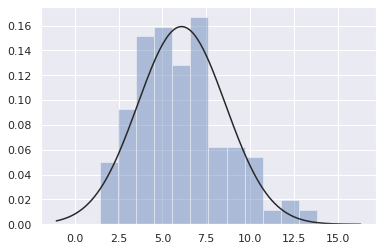

In [30]:
y = np.random.gamma(6, size = 250)
sns.distplot(y, kde = False, fit = stats.norm);

Si lo repetimos ajustando los mismos datos a una distribución gamma, el resultado es el esperado, comprobando que los datos se ajustan a esta distribución:

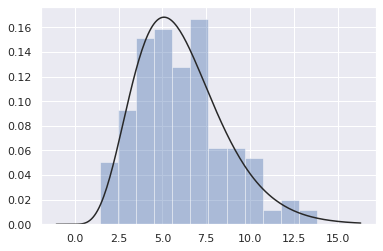

In [31]:
sns.distplot(y, kde = False, fit = stats.gamma);

## Distribuciones bivariadas
Otro de los escenarios en los que podemos encontrarnos es aquel en el que deseamos evaluar la distribución conjunta de dos variables. Podemos utilizar la función [seaborn.jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html) con este fin. Esta función nos muestra una figura multipanel en la que se incluye una gráfica principal mostrando la distribución conjunta de las dos variables en análisis y la distribución marginal de cada una de las variables por separado.

### Gráfico de dispersión
El comportamiento por defecto de la función [seaborn.jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html) es mostrar un gráfico de dispersión de las dos variables siendo analizadas y un histograma adicional para cada una de ellas:

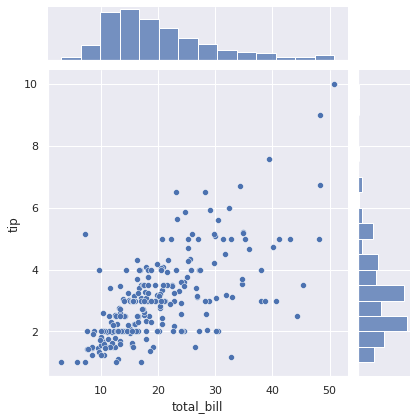

In [32]:
tips = sns.load_dataset("tips")
sns.jointplot(x = "total_bill", y = "tip", data = tips);

En el gráfico anterior estamos cruzando las variables total_bill y tip del dataset tips, y vemos en el centro el gráfico de dispersión de ambas variables, así como los histogramas de cada variable en la parte superior y lateral derecho.

El parámetro **kind** de la función sns.jointplot toma por defecto el valor "scatter", por lo que las dos funciones siguientes son equivalentes:

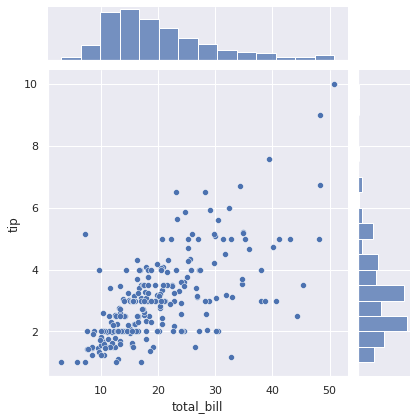

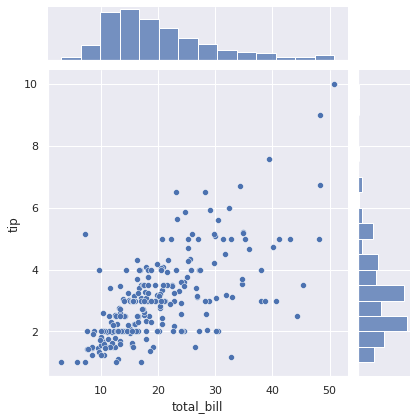

In [33]:
sns.jointplot(x = "total_bill", y = "tip", data = tips);

sns.jointplot(x = "total_bill", y = "tip", data = tips, kind = "scatter");

### Gráfico de dispersión hexagonal
Una alternativa al gráfico de dispersión es el gráfico de dispersión hexagonal, en el que el plano se divide en hexágonos y se muestra con distintos colores el número de valores o puntos en cada hexágono:

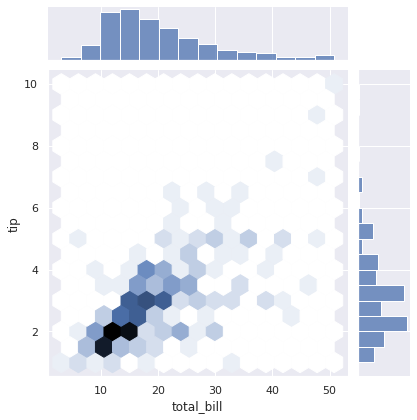

In [34]:
tips = sns.load_dataset("tips")
sns.jointplot(x = "total_bill", y = "tip", data = tips, kind = "hex");

Vemos que el único cambio con repecto a la función equivalente que genera el gráfico de dispersión es la inclusión del argumento kind = "hex".

Para controlar el número de hexágonos a mostrar tenemos que hacer uso del parámetro joint_kws. Este parámetro es un diccionario que nos permite pasar a la función parámetros adicionales, como gridsize, parámetro que controla exactamente el número de hexágonos:

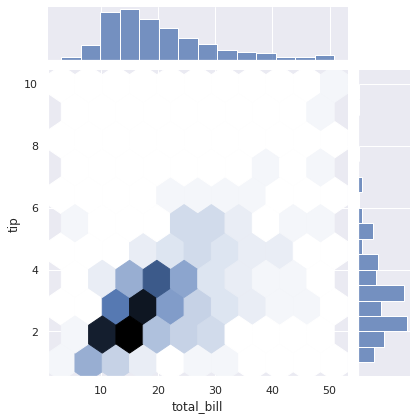

In [35]:
sns.jointplot(x = "total_bill", y = "tip", data = tips, kind = "hex", joint_kws = {"gridsize":10});

### Estimación de densidad kernel
También podemos mostrar en la gráfica principal la estimación de densidad kernel para visualizar la distribución bivariada. Para ello no tenemos más que pasar a la función [seaborn.jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html) el argumento **kind = "kde"**:



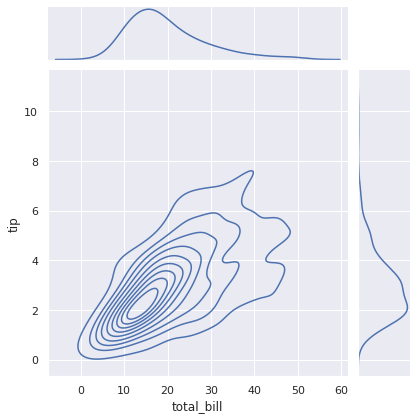

In [36]:
sns.jointplot(x = "total_bill", y = "tip", data = tips, kind = "kde");

### La función kdeplot para distribuciones bivariadas
También es posible utilizar la función [seaborn.kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) ya vista para mostrar la distribución de dos variables. Para esto basta con pasar como primeros argumentos las referencias a las característica en cuestión.

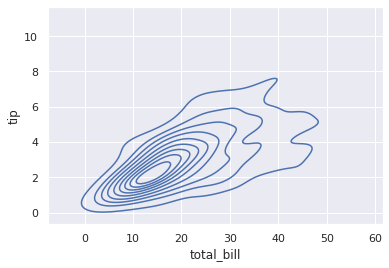

In [37]:
tips = sns.load_dataset("tips")
sns.kdeplot(tips["total_bill"], tips["tip"]);

El parámetro **shade**, cuando toma el valor True, rellena los contornos:

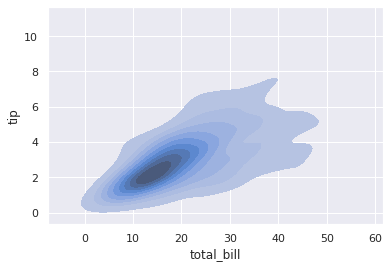

In [38]:
sns.kdeplot(tips["total_bill"], tips["tip"], shade = True);

El parámetro **n_levels** controla el número de niveles distintos a mostrar:

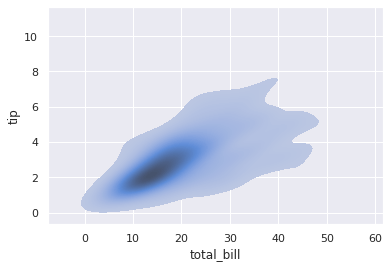

In [39]:
sns.kdeplot(tips["total_bill"], tips["tip"], shade = True, n_levels = 100);

## Distribuciones de varias variables
Con el fin de de visualizar múltiples distribuciones bivariadas de conjuntos de datos podemos recurrir a la función [seaborn.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html). Esta función a nivel de figura crea una matriz de ejes y muestra la distribución de cada par de características:

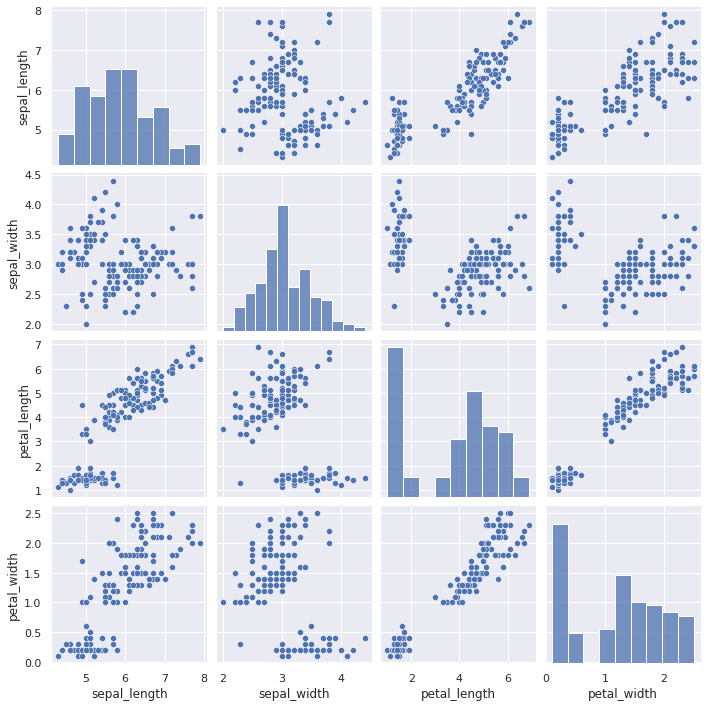

In [40]:
iris = sns.load_dataset("iris")
sns.pairplot(iris);

Vemos que en la diagonal principal se muestran las distribuciones univariadas de cada característica.

## Relaciones entre variables cuantitativas
Otra tarea fundamental en el proceso de análisis exploratorio de un conjunto de datos es entender cuál es la relación entre variables. De hecho, ya hemos visto una forma de visualizar esta relación usando la función [seaborn.jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html) que muestra, por defecto, un diagrama de dispersión. En esta sección veremos la funcionalidad ofrecida por la función [seaborn.relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html) que permite, no solo crear gráficos de dispersión, sino también gráficos de líneas. Se trata ésta de una función a nivel de figura que, en función del valor que tome el parámetro kind, ejecutará, a su vez, las funciones a nivel de ejes [seaborn.scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) (cuando kind tome el valor "scatter", valor por defecto) o [seaborn.lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html) (cuando kind tome el valor "line").



### Diagrama de dispersión
La función seaborn.relplot muestra, por defecto, un diagrama de dispersión de las dos variables pasadas como argumentos:

In [41]:
iris = sns.load_dataset("iris")

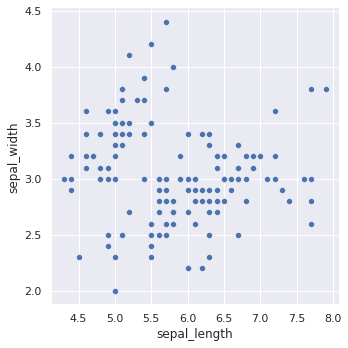

In [42]:
sns.relplot(x = "sepal_length", y = "sepal_width", data = iris);

Estas variables suelen ser cuantitativas pues, en el caso de que alguna de ellas sea cualitativa, seaborn ofrece gráficas más adecuadas para visualizar la relación entre ellas, como veremos más adelante.

El comportamiento por defecto de la función sns.relplot es el correspondiente al argumento kind = "scatter". Es decir, las dos siguientes instrucciones son equivalentes:

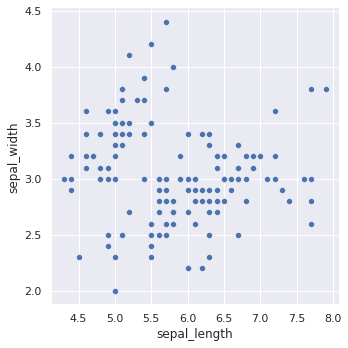

In [43]:
sns.relplot(x = "sepal_length", y = "sepal_width", data = iris);

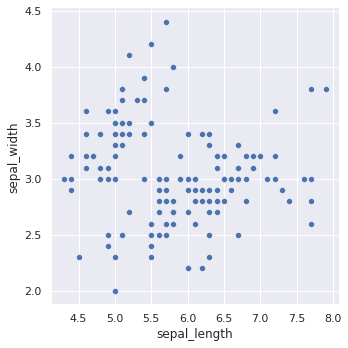

In [44]:
sns.relplot(x = "sepal_length", y = "sepal_width", data = iris, kind = "scatter");

Es posible añadir una dimensión adicional utilizando el parámetro **"hue"** ("tonalidad" en español). Éste controla el color de los puntos:

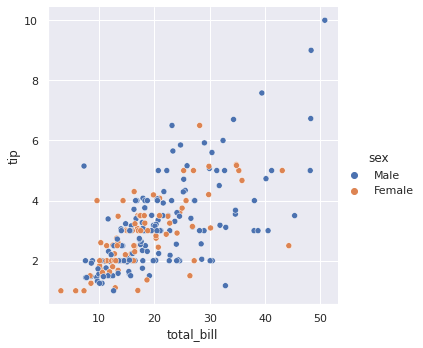

In [45]:
tips = sns.load_dataset("tips")
sns.relplot(x = "total_bill", y = "tip", hue = "sex", data = tips);

En el caso anterior se ha utilizado una variable cualitativa para establecer el color de los puntos, lo que resulta muy sencillo de interpretar (si su cardinalidad no es muy elevada: si tuviésemos 28 valores distintos en la variable "sex" probablemente no sería tan fácilmente interpretable). También podemos utilizar una variable cuantitativa, aunque esto eleva ligeramente la complejidad de la gráfica. Por ejemplo, si mostramos por colores el número de comensales (característica "size"), el resultado es el siguiente:

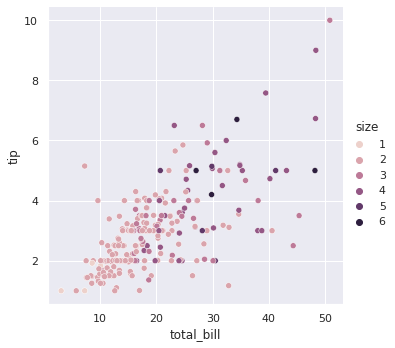

In [46]:
sns.relplot(x = "total_bill", y = "tip", hue = "size", data = tips);

Obsérvese como, en este caso, seaborn ha cambiado la paleta de colores a una secuencial.

El parámetro **style** permite añadir una dimensión adicional al aplicar un marcador diferente a cada uno de los puntos en función de los valores de la variable que se indique. Si se está añadiendo este criterio de segmentación a una gráfica en la que ya estuviésemos haciendo uso del color (parámetro hue) para segmentar los datos, el resultado puede resultar claramente difícil de interpretar. Por ejemplo, en la siguiente gráfica se modifica la anterior para añadir símbolos distintos en función de que la comida haya sido almuerzo o cena:

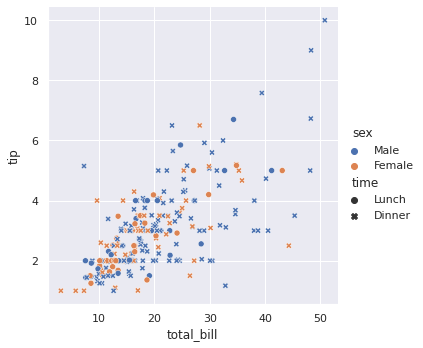

In [47]:
sns.relplot(x = "total_bill", y = "tip", hue = "sex", data = tips, style = "time");

El resultado, efectivamente, no transmite el mensaje con la facilidad que desearíamos (y en este caso solo tenemos dos valores en la variable sex y otros dos en la variable time. Si su cardinalidad fuese mayor, el resultado sería todavía más confuso). Lo que sí podemos hacer es utilizar este herramienta para cambiar los puntos no solo por color según el valor de la variable sex, sino también por símbolo, para reforzar el mensaje:

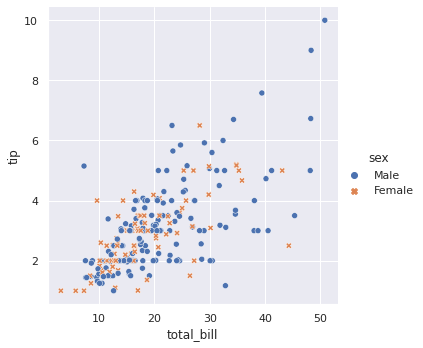

In [48]:
sns.relplot(x = "total_bill", y = "tip", hue = "sex", data = tips, style = "sex");

La tercera alternativa para añadir una nueva dimensión a los datos es mediante el tamaño de los puntos, lo que podemos conseguir con el parámetro **size**:

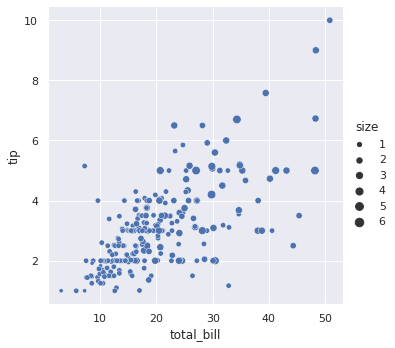

In [49]:
sns.relplot(x = "total_bill", y = "tip", size = "size", data = tips);

En la imagen anterior estamos modificando el tamaño del punto en función del número de comensales (campo size del conjunto de datos).

Como se ha comentado, la función seaborn.relplot ejecuta, por defecto, la función seaborn.scatterplot (siendo ésta última una función a nivel de ejes). De esta forma, la anterior gráfica puede ser también creada con la siguiente instrucción:

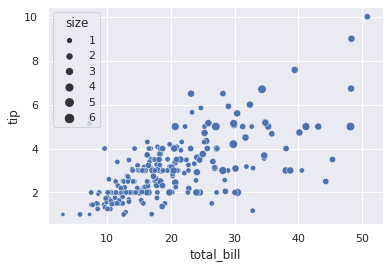

In [50]:
sns.scatterplot(x = "total_bill", y = "tip", size = "size", data = tips);

El único cambio apreciable es el tamaño de la gráfica, pero no olvidemos que las funciones a nivel de figura crean y controlan la figura y el conjunto de ejes según sus propios criterios.

### Deshabilitando la leyenda
En ocasiones puede ser conveniente ocultar la leyenda de la gráfica. Para ello, basta con añadir el argumento legend = False. De esta forma, si repetimos el gráfico anterior con esta modificación:

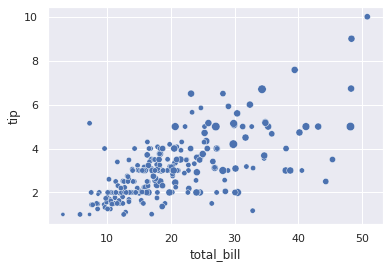

In [51]:
sns.scatterplot(x = "total_bill", y = "tip", size = "size", data = tips, legend = False);

...vemos que no se ha mostrado.

## Gráfico de líneas
Un caso especial de la gráfica de dispersión es la que muestra la relación entre dos variables cuando existe una dependencia, por ejemplo, cuando tenemos datos de una variable a lo largo del tiempo, del espacio o de otra variable cuantitativa continua. Este tipo de gráficas pueden conseguirse con la función seaborn.relplot con el argumento kind = "line":

In [52]:
df = pd.DataFrame({
    "x": range(100),
    "y": np.random.randn(100).cumsum()
})

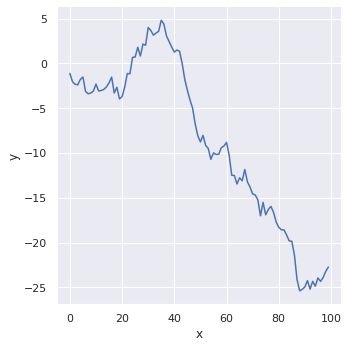

In [53]:
sns.relplot(x = "x", y = "y", data = df, kind = "line");

Esta misma gráfica (salvo por el tamaño) puede conseguirse con la función a nivel de ejes seaborn.lineplot:

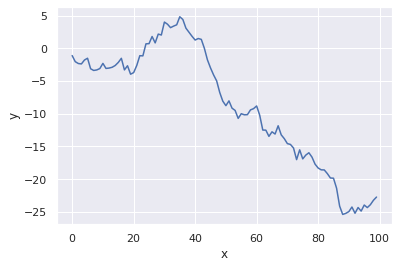

In [54]:
sns.lineplot(x = "x", y = "y", data = df);

Por supuesto, aun cuando estemos mostrando el gráfico de líneas, seguimos teniendo a nuestra disposición las herramientas vistas para esta función, controlables mediante los parámetros hue, size y style. Esto lo veremos en breve.

Echemos un vistazo antes a las gráficas de líneas con agregación de datos.

### Gráfico de líneas con agregación
Un caso especial de gráficos de líneas lo encontramos cuando para cada valor de x puede existir más de un valor y. En estos casos, el comportamiento por defecto de seaborn es mostrar el valor medio de los valores y el intervalo de confianza del 95%. Un ejemplo de este tipo lo encontramos en el dataset de ejemplo flights, con información del número de pasajeros transportados por mes y por año:

In [55]:
flights = sns.load_dataset("flights")
flights.sample(5)

,year,month,passengers
125,1959,Jun,472
5,1949,Jun,135
81,1955,Oct,274
127,1959,Aug,559
94,1956,Nov,271


Mostremos la gráfica de líneas de pasajeros transportados por año:

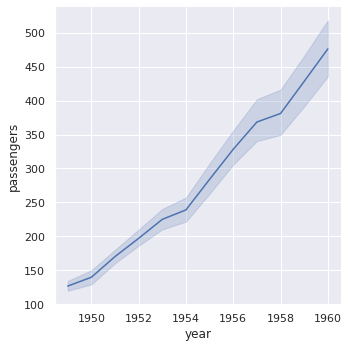

In [56]:
sns.relplot(x = "year", y = "passengers", kind = "line", data = flights);

La línea principal mostrada de color azul oscuro es el valor medio de los pasajeros transportados el año correspondiente, y el área azul claro por encima y por debajo supone el intervalo de confianza del 95%. Este intervalo es calculado usando [bootstrapping](https://es.wikipedia.org/wiki/Bootstrapping_(estad%C3%ADstica)).

El parámetro ci (confidence interval) controla el comportamiento de esta opción. Puede tomar como valores un número, el texto "sd", False o None. En el primer caso indicará el intervalo de confianza a aplicar (habrá que indicar un número entero entre 0 y 100. El valor por defecto, como hemos visto, es 95). En el siguiente ejemplo se muestra la misma gráfica con un intervalo de confianza del 40%:

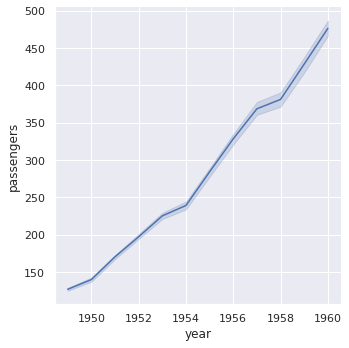

In [57]:
sns.relplot(x = "year", y = "passengers", kind = "line", data = flights, ci = 40);

Si toma el valor "sd" se mostrará la desviación estándar de los datos:



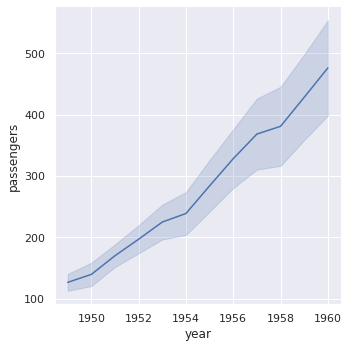

In [58]:
sns.relplot(x = "year", y = "passengers", kind = "line", data = flights, ci = "sd");

Por último, pasando al parámetro el valor None o False se desactiva el cálculo del intervalo de confianza:

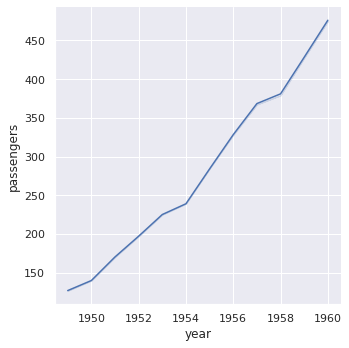

In [59]:
sns.relplot(x = "year", y = "passengers", kind = "line", data = flights, ci = False);

De hecho, todos los ejemplos anteriores han mostrado un intervalo de confianza en torno al valor medio de los datos, pero es posible agregarlos según otros métodos de pandas utilizando el parámetro **estimator**. Por ejemplo, según la mediana:

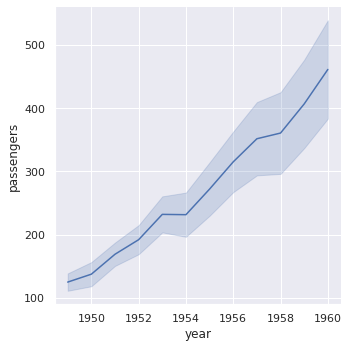

In [60]:
sns.relplot(x = "year", y = "passengers", kind = "line", data = flights, estimator = "median", ci = "sd");

...según el valor máximo:

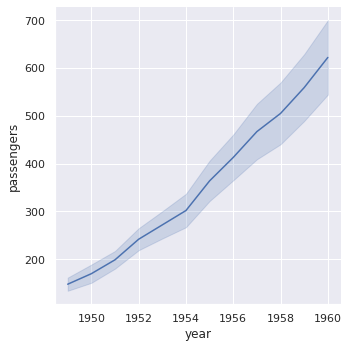

In [61]:
sns.relplot(x = "year", y = "passengers", kind = "line", data = flights, estimator = "max", ci = "sd");

Usando la función a nivel de ejes equivalente, sns.lineplot, podemos mostrar la gráfica anterior con tres estimadores (correspondientes al valor medio, máximo y mínimo) y ver cómo se representa cada uno:

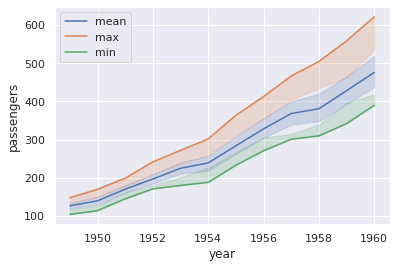

In [62]:
sns.lineplot(x = "year", y = "passengers", data = flights, estimator = "mean", label = "mean");
sns.lineplot(x = "year", y = "passengers", data = flights, estimator = "max", label = "max");
sns.lineplot(x = "year", y = "passengers", data = flights, estimator = "min", label = "min");

## Variables visuales en gráficos de líneas
Ya comentamos que la función seaborn.relplot (y su correspondiente función a nivel de ejes cuando se muestran gráficos de líneas, seaborn.lineplot) tienen las mismas opciones de agregación de nuevas dimensiones de información que la función seaborn.scatterplot. Veámoslas una a una, y para ello partamos del dataset fmri:

In [63]:
fmri = sns.load_dataset("fmri")
fmri.sample(5)

,subject,timepoint,event,region,signal
966,s1,7,cue,frontal,-0.053825
239,s12,1,stim,parietal,0.010625
782,s1,17,cue,frontal,-0.000439
313,s5,3,stim,frontal,0.086629
883,s0,13,cue,parietal,-0.035780


Este dataset muestra información de señales captadas en diferentes regiones del cráneo, de diferentes sujetos, en diferentes momentos, y debido a diferentes eventos (sea lo que sea que esto significa, pues esta información no está documentada). Es decir, para un momento determinado (campo timepoint) tendremos varias señales. Mostremos ambos campos en una gráfica de líneas básica:

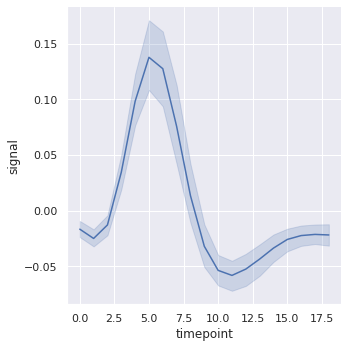

In [64]:
sns.relplot(x = "timepoint", y = "signal", data = fmri, kind = "line");

Pues bien, podemos dividir la línea mostrada en dos según el evento que genera la señal, mostrando cada una de un color distinto, usando el parámetro **hue**:

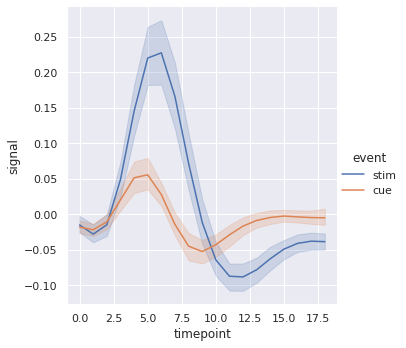

In [65]:
sns.relplot(x = "timepoint", y = "signal", data = fmri, kind = "line", hue = "event");

El parámetro **style** también provoca la disgregación de la curva inicial en varias, en este caso diferenciadas por el estilo de línea:

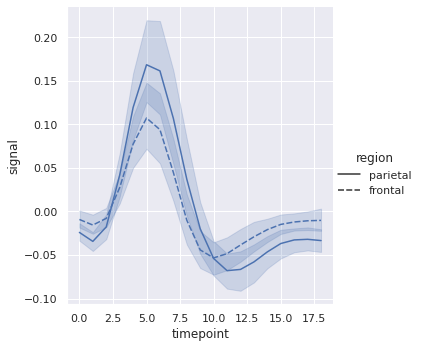

In [66]:
sns.relplot(x = "timepoint", y = "signal", data = fmri, kind = "line", style = "region");

Por último, también es posible modificar el tamaño de las líneas, aunque si no existe una relación directa entre éste y las cifras representadas por cada línea, difícilmente será correctamente interpretada esta variable visual:

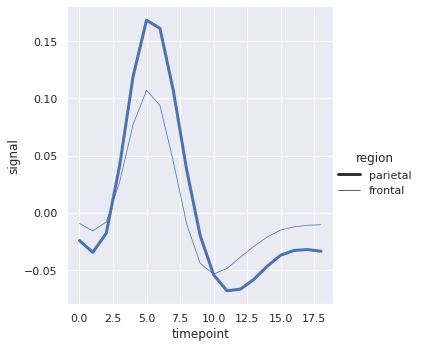

In [67]:
sns.relplot(x = "timepoint", y = "signal", data = fmri, kind = "line", size = "region", ci = None);

(se ha eliminado el intervalo de confianza para poder visualizar mejor las líneas).

## Facets
Vemos que, aun cuando es técnicamente posible aumentar el número de dimensiones mostradas en una gráfica, el resultado no siempre es tan comprensible como desearíamos. Una alternativa es la generación de múltiples gráficas, cada una mostrando los datos relativos a un valor de la dimensión adicional. Estas **gráficas múltiples** es lo que en seaborn se denominan **facets**. Veamos un ejemplo: Ya hemos visto que podemos recurrir al uso de diferentes marcadores para diferenciar valores de una variable categórica:

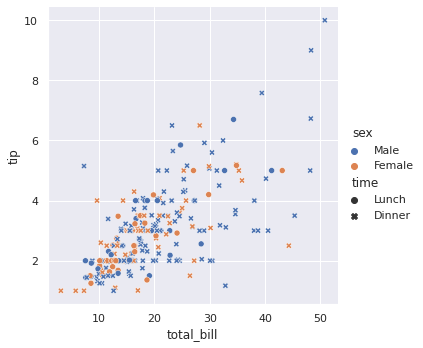

In [5]:
sns.relplot(x = "total_bill", y = "tip", hue = "sex", data = tips, style = "time");

En este ejemplo estamos cruzando las variables **tip** y **total_bill**, diferenciando los puntos según el **sexo** de la persona que dejó la propina (azul hombres y naranja mujeres), y usando símbolos distintos (puntos y aspas) para diferenciar la comida en cuestión: el punto representa un almuerzo y el aspa una cena. Esto nos lleva a tener puntos azules y puntos naranjas (representando hombre-almuerzo y mujer-almuerzo, respectivamente) y aspas azules y aspas naranjas (representando hombre-cena y mujer-cena). Pues bien, con el parámetro **col** podemos mostrar en columnas los datos correspondientes a valores distintos de una variable, por ejemplo, la variable **time** indicando el tipo de comida:

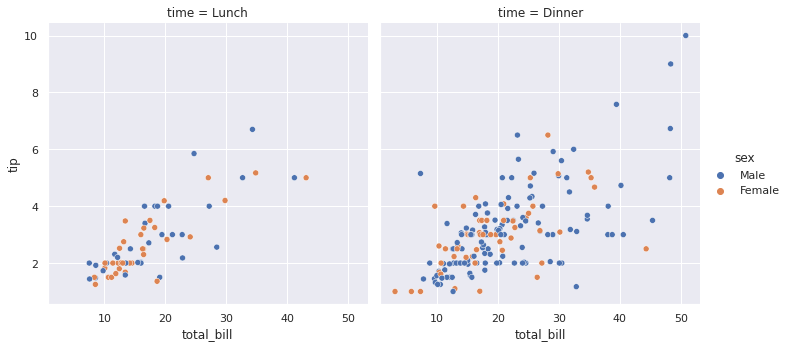

In [6]:
sns.relplot(x = "total_bill", y = "tip", hue = "sex", data = tips, col = "time");

Ahora, lo que antes eran puntos representando almuerzos es ahora una gráfica -la de la izquierda- que solo muestra dicha información. Y lo que eran aspas indicando cenas es ahora también una gráfica independiente -la de la derecha-. La información es mucho más clara ahora que antes.

También es posible mostrar las gráficas en filas usando el parámetro **row**. En el siguiente ejemplo volvemos a cruzar las variables tip y total_bill, desglosando la información por sexo (y mostrando este desglose con diferentes colores) y desglosamos a su vez la gráfica en dos: una con información sobre fumadores y otra con información sobre no fumadores:

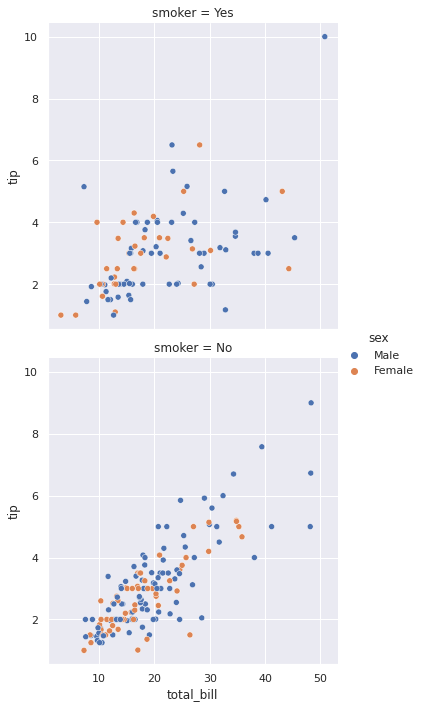

In [7]:
sns.relplot(x = "total_bill", y = "tip", hue = "sex", data = tips, row = "smoker");

Por supuesto, podemos combinar los parámetros **row y col** para desglosar nuestra gráfica base según dos criterios adicionales (lo que supone añadir dos dimensiones a la visualización). En el siguiente ejemplo combinamos los dos ejemplos anteriores, mostrando en filas el hecho de que el cliente sea o no fumador, y en filas el tipo de comida:

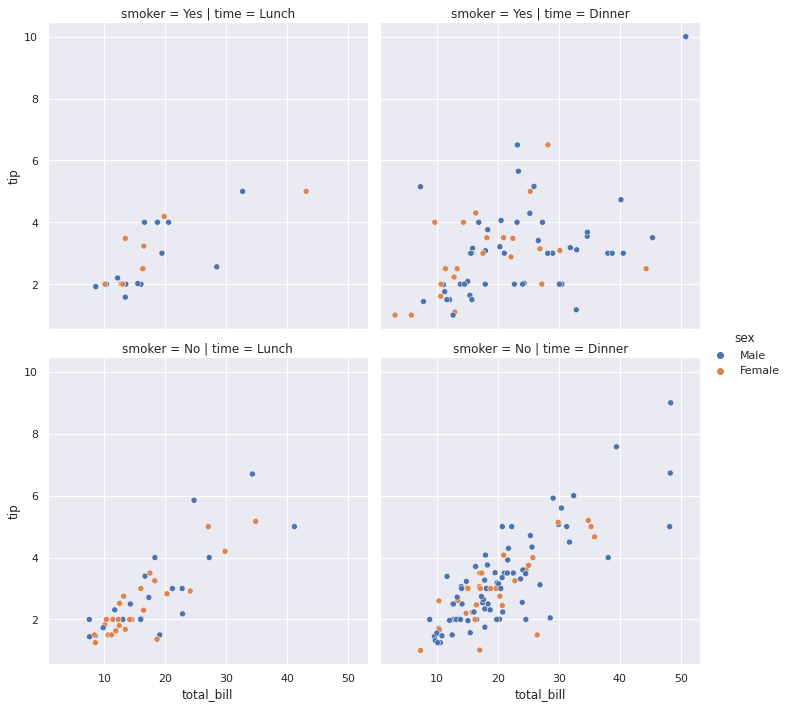

In [8]:
sns.relplot(x = "total_bill", y = "tip", hue = "sex", data = tips, row = "smoker", col = "time");

Lógicamente, si la cardinalidad de estas variables es elevada, podemos encontrarnos con gráficas excesivamente grandes. Una opción es modificar el tamaño de la figura usando los parámetros **height y/o aspect**: Por ejemplo, se muestra a continuación la figura anterior limitando la altura de la misma:

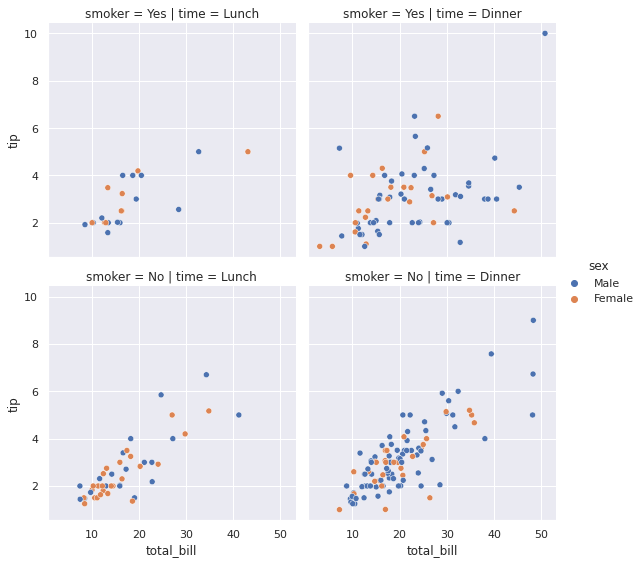

In [11]:
sns.relplot(x = "total_bill", y = "tip", hue = "sex", data = tips, row = "smoker", col = "time", height = 4);

Y, a continuación, con un **aspecto** modificado:

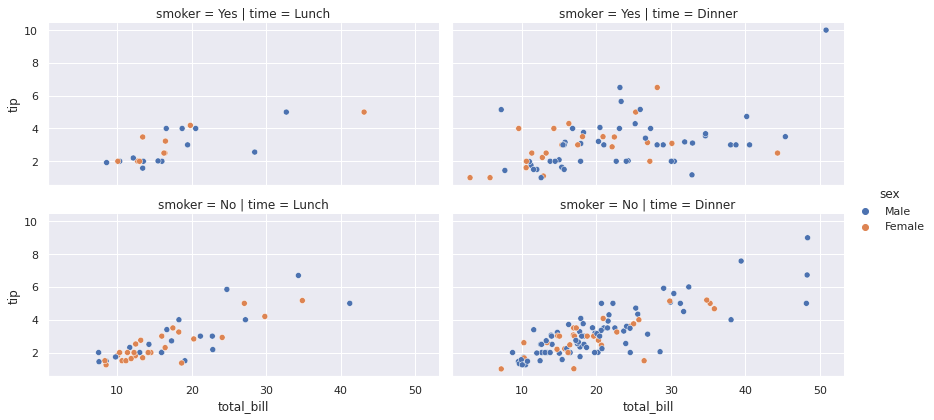

In [12]:
sns.relplot(x = "total_bill", y = "tip", hue = "sex", data = tips, row = "smoker", col = "time", height = 3, aspect = 2);

Si estamos añadiendo solo una variable y mostrándola en columnas, si la cardinalidad de esta variable es elevada las gráficas resultantes puedes ser tan pequeñas que no sean apreciables los detalles:

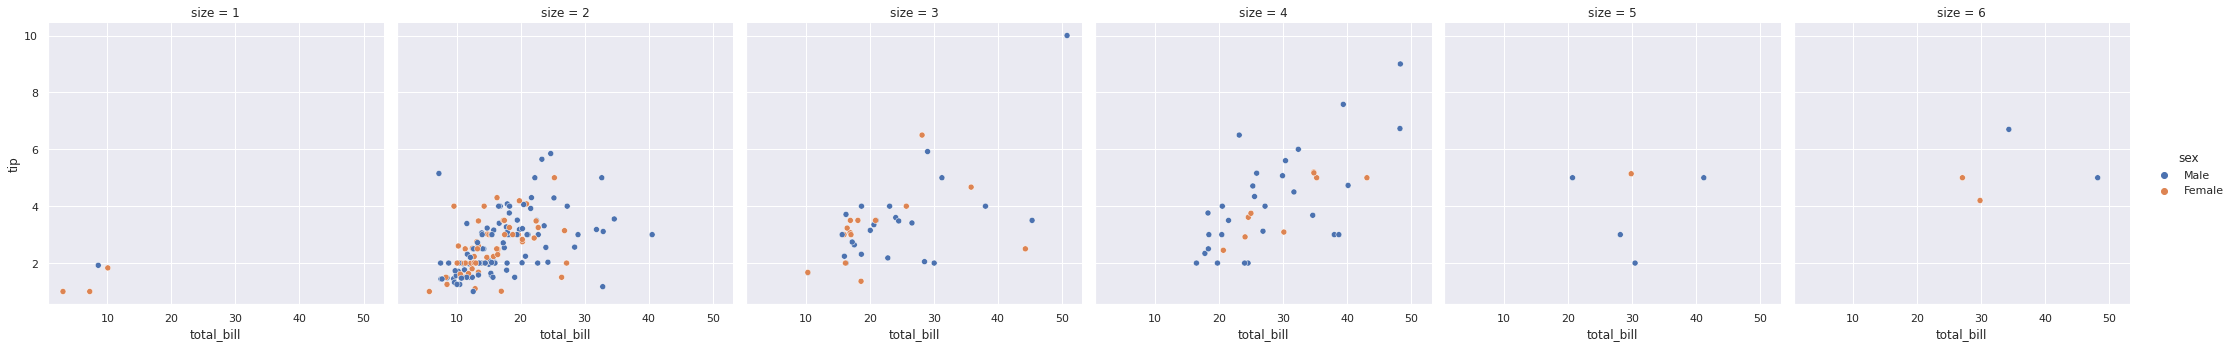

In [13]:
sns.relplot(x = "total_bill", y = "tip", hue = "sex", data = tips, col = "size");

En la imagen anterior estamos mostrando por columnas los valores del campo **"size"** que indica el número de comensales. Efectivamente, es imposible incluso leer el título de cada gráfica.

La solución es limitar el número de gráficas por fila usando el parámetro **col_wrap**. Si repetimos la figura anterior limitando a 3 el número de gráficas por fila, el resultado es el siguiente:

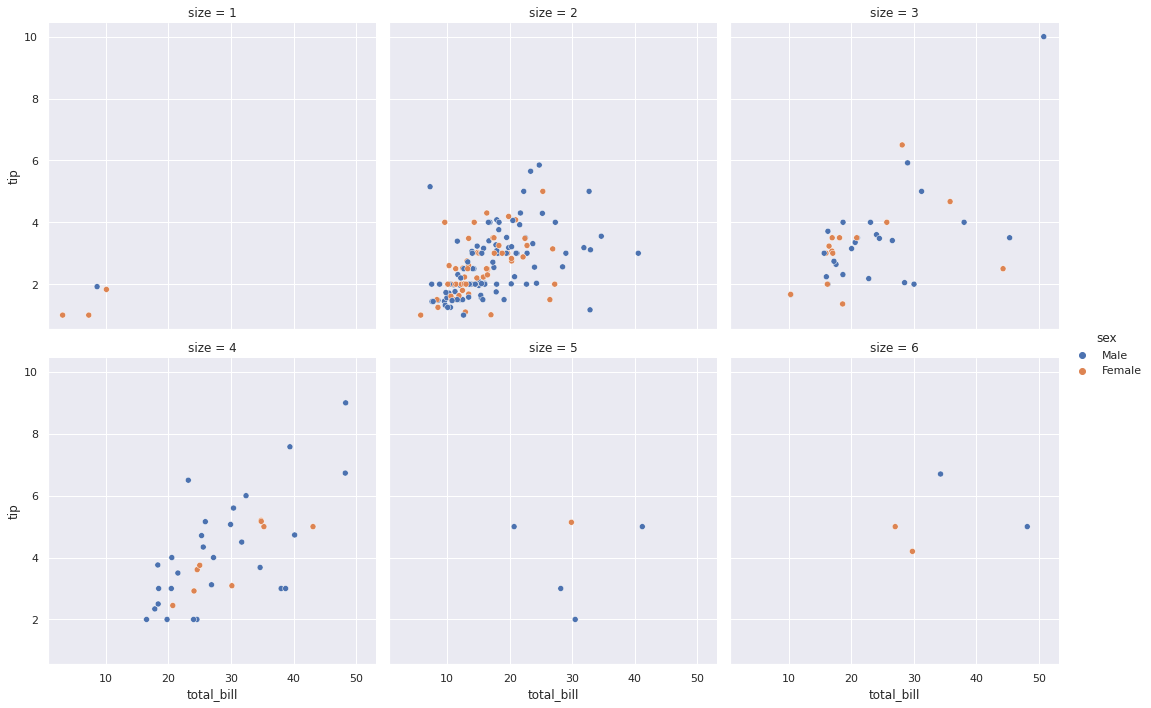

In [14]:
sns.relplot(x = "total_bill", y = "tip", hue = "sex", data = tips, col = "size", col_wrap = 3);

...mucho más claro, sin duda, aun cuando los cambios no se muestren estrictamente solo en columnas o en filas. Recuerda en todo caso que esta opción está disponible solo **si los facets se reparten en columnas** (no puedes estar haciendo uso del parámetro row).

# Relaciones entre variables cuantitativas y cualitativas
Aun cuando las funciones vistas hasta ahora también pueden servir en casos en los que alguna de las variables sea cualitativa -de hecho, las hemos utilizado para definir variables visuales como el color o el tamaño de los marcadores-, en casos como el descrito puede resultar útil recurrir a gráficas más especializadas. En seaborn, estas gráficas más orientadas a mostrar distribuciones o relaciones implicando variables categóricas son ofrecidas por una función a nivel de figura: [seaborn.catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html). En función del valor del parámetro kind, esta función ejecutará una función a nivel de ejes.

seaborn divide estas función en tres familias:

* Diagramas de dispersión categóricos:
    * `stripplot()` (cuando kind = "strip", valor por defecto)
    * `swarmplot()` (cuando kind = "swarm")
* Gráficas de distribución categórica:
    * `boxplot()` (cuando kind = "box")
    * `violinplot()` (cuando kind = "violin")
    * `boxenplot()` (cuando kind = "boxen")
* Gráficas de estimación categórica:
    * `pointplot()` (cuando kind = "point")
    * `barplot()` (cuando kind = "bar")
    * `countplot()` (cuando kind = "count")
    
Estas familias de gráficas representan la información usando diferentes tipos de granularidad. En las siguientes páginas revisaremos todas ellas.

## Diagramas de dispersión categóricos
La primera de las familias de funciones se encarga de generar diagramas de dispersión para variables categóricas, mostrando éstas en el eje **x** y la variable cuantitativa en el eje **y**, representando cada valor por un punto. Hay dos enfoques alternativos: el **strip plot** y el **swarm plot**.

### Strip plot
La primera de estas alternativas es el strip plot, que puede ser mostrado usando la función a nivel de figura seaborn.catplot con el argumento **kind = "strip"** (o sin argumento, ya que el mencionado valor es el que toma por defecto) o con la función a nivel de ejes [seaborn.stripplot](https://seaborn.pydata.org/generated/seaborn.stripplot.html). Como se ha comentado, esta función sitúa la variable categórica en el eje x y la variable cuantitativa en el eje y, mostrando con un punto cada uno de los valores. Para poder distinguir los puntos en el caso de que estén muy próximos, por defecto se aplica un **"temblor"** (jitter) a los puntos para separarlos del eje vertical de forma aleatoria:

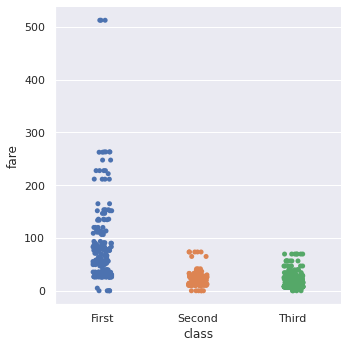

In [17]:
sns.catplot(x = "class", y = "fare", data = titanic);

En la anterior imagen se muestra el precio pagado por el billete para los pasajeros del Titanic en función de la clase del pasaje (primera, segunda o tercera).

El parámetro **jitter** controla la magnitud del temblor. Por ejemplo, podemos aumentar el ancho de las barras aumentando el temblor aplicado:

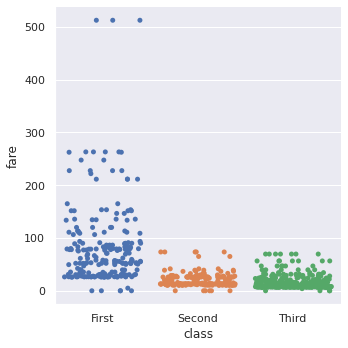

In [18]:
sns.catplot(x = "class", y = "fare", data = titanic, jitter = 0.4);

También puede ser desactivado estableciendo el valor del parámetro jitter a **False**:

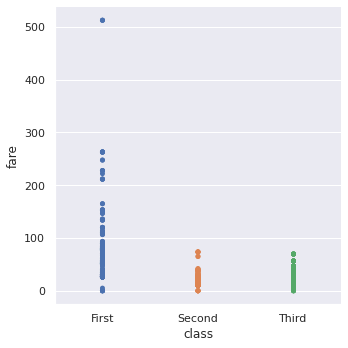

In [19]:
sns.catplot(x = "class", y = "fare", data = titanic, jitter = False);

Podemos mostrar la gráfica horizontalmente intercambiando los argumentos **x e y**:

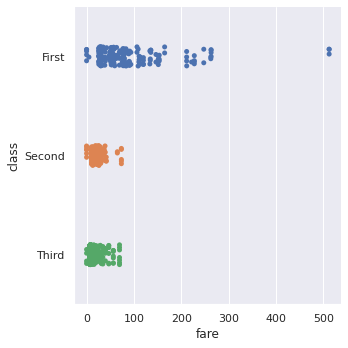

In [20]:
sns.catplot(x = "fare", y = "class", data = titanic);

Normalmente este sencillo cambio suele ser suficiente para que seaborn sea capaz de reconocer la variable cualitativa. En el caso de que la cardinalidad de ésta sea elevada y seaborn no sea capaz de distinguirla de la variable cuantitativa, tanto la función sns.catplot como la función sns.stripplot aceptan el parámetro **orient**, pudiendo tomar los valores **"h"** o **"v"**, para especificar la orientación de la gráfica de forma explícita.

Podemos añadir una dimensión adicional recurriendo al parámetro hue que aplica un color a los puntos en función de los valores que tome otra variable. Por ejemplo, si queremos mostrar en las visualizaciones anteriores la diferencia entre sexos:

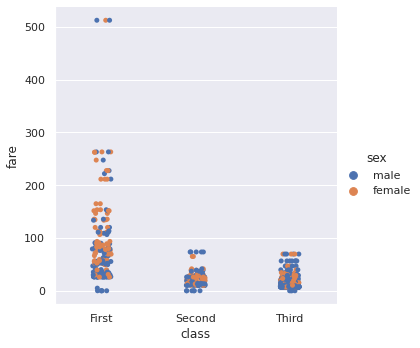

In [21]:
sns.catplot(x = "class", y = "fare", data = titanic, hue = "sex");

Esta variable visual -el color- es la única soportada por la función sns.catplot o por las funciones a nivel de ejes equivalentes (no soportan ni **style** ni **size**).

### Swarm plot
La segunda alternativa es el denominado **swarm plot**, beeswarm o **gráfico de enjambre**. Este tipo de gráfica se muestra al ejecutar la función a nivel de figura [seaborn.catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html) con el argumento kind = "swarm" o al ejecutar la función a nivel de ejes equivalente, [seaborn.swarmplot](https://seaborn.pydata.org/generated/seaborn.swarmplot.html). Estas funciones generan gráficas semejantes a las generadas por seaborn.stripplot, pero aplicando a la posición de los puntos cierto algoritmo de forma que no solapen. Esto ofrece una mejor visualización a costa de dejar de ser útil para conjuntos de datos muy grandes:

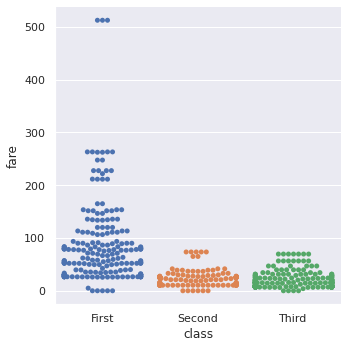

In [22]:
sns.catplot(x = "class", y = "fare", data = titanic, kind = "swarm");

Como puede apreciarse, esta visualización permite obtener una mejor idea de la distribución de los valores, aunque el área ocupada por cada barra aumenta según aumenta el número de puntos a mostrar.

Al igual que ocurría con el strip plot, podemos mostrar la gráfica horizontalmente intercambiando los argumentos x e y:

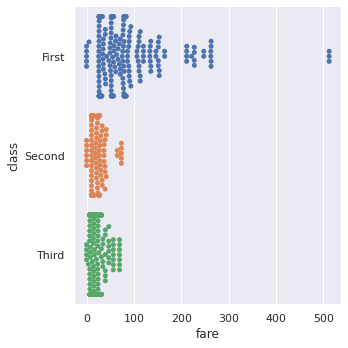

In [24]:
sns.catplot(x = "fare", y = "class", data = titanic, kind = "swarm");

-ya sabemos que cuando esto no sea suficiente, disponemos del parámetro orient que nos permite definir explícitamente la orientación del gráfico-.

También podemos añadir una dimensión con el parámetro hue que regula el color de los puntos (ya se ha comentado que esta variable visual es la única soportada por la función sns.catplot y por las funciones a nivel de ejes equivalentes):

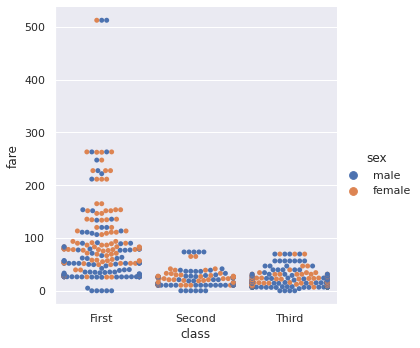

In [26]:
sns.catplot(x = "class", y = "fare", data = titanic, kind = "swarm", hue = "sex");

## Gráficas de distribución categórica
Tanto los **strip plots** como los **swarm plots** son extremadamente útiles para ver la distribución de las variables categóricas... siempre que el conjunto de datos no sea demasiado grande pues, llegado cierto punto, ninguna de las dos funciones mencionadas permiten visualizar las distribuciones correctamente: en el primer caso porque la columna de puntos pasa a convertirse en una columna sólida en la que no es posible distinguir los puntos, y en el segundo caso porque el espacio requerido por los puntos, al no solapar, es excesivamente grande. En estos casos es preferible recurrir a métodos que agreguen la información relativa a la distribución. seaborn nos ofrece tres alternativas: el **box plot**, el **boxen plot** y el **violin plot**. Veámoslos uno a uno.

### Box plot
El diagrama de caja, también conocido como **diagrama de caja** y **bigote** o **box plot**, resume la distribución de los datos mostrándonos la posición de sus cuartiles y de los valores atípicos (outliers). Se muestra en seaborn con la función seaborn.catplot y el argumento kind = "box" o con la función [seaborn.boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html). Por defecto, tras calcular la **mediana** y los **cuartiles Q1 y Q3**, se calcula el conocido como **rango intercuantil (Q3 - Q1)**. Los **"bigotes"** o **"whiskers"** (la línea que sale de la caja) se extienden hasta cubrir 1.5 veces el rango intercuantil por debajo y por encima de Q1 y de Q3, respectivamente. Todos los puntos fuera de este rango son considerados **valores atípicos** y son mostrados como puntos individuales:

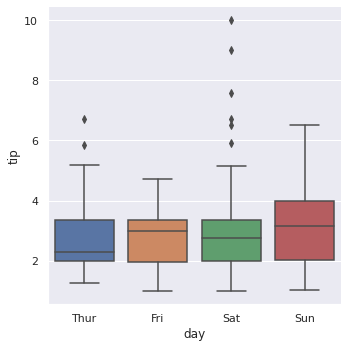

In [27]:
sns.catplot(x = "day", y = "tip", data = tips, kind = "box");

En el anterior gráfico distinguimos los cuartiles Q1 y Q3 (límites superior e inferior de las "cajas", distancia a la que nos hemos referido como rango intercuantil), **la mediana** (línea horizontal dentro de la caja) y los valores considerados "normales" entre los topes superior e inferior de las líneas verticales (los topes **representan 1.5 veces** el rango intercuantil). Fuera de estos límites vemos los outliers o valores anómalos.

La distancia más allá de la cual un valor se considera anómalo se puede personalizar con el **parámetro whis**. Éste toma, por defecto, el mencionado valor de 1.5. Obsérvese cómo cambia la gráfica si aumentamos este valor a, por ejemplo, 3:

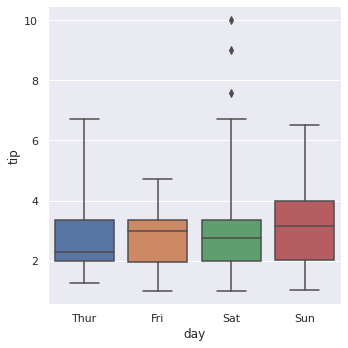

In [28]:
sns.catplot(x = "day", y = "tip", data = tips, kind = "box", whis = 3);

Ahora, los valores que eran outliers en la primera gráfica para el jueves ya son todos considerados normales. Y los outliers del sábado también han disminuido en número de forma considerable.

En este tipo de gráfica seguimos teniendo acceso al **parámetro hue**:

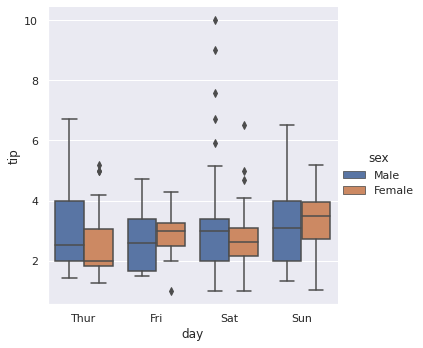

In [29]:
sns.catplot(x = "day", y = "tip", data = tips, kind = "box", hue = "sex");

Vemos que, si en la categoría de **"diagramas de dispersión categóricos"** se mostraba cada punto de un color distinto, ahora que se está agregando la información, la alternativa es dividir cada caja según los valores que tome la categoría que se indique (**"sex"**, en este caso).

De todas formas, este enfoque está limitado por el número de valores posibles que tome dicha categoría. En el ejemplo anterior eran dos valores: Male y Female, pero veamos el resultado si utilizamos como variable de **segmentación "size"**, representando el número de comensales:

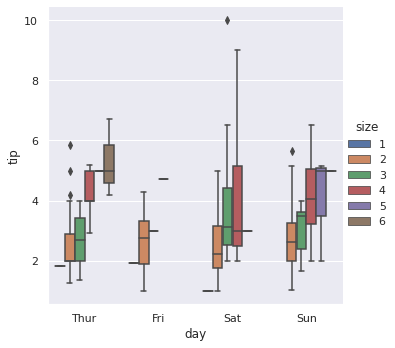

In [30]:
sns.catplot(x = "day", y = "tip", data = tips, kind = "box", hue = "size");

Aun cuando seaborn hace un bastante buen trabajo mostrando las cajas para cada valor de la variable de segmentación, la interpretación de la gráfica comienza a resultar más compleja. Una opción, por supuesto, es aumentar el tamaño de la figura:

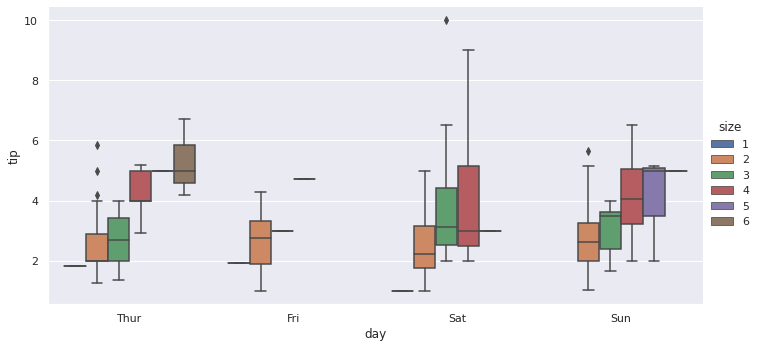

In [31]:
sns.catplot(x = "day", y = "tip", data = tips, kind = "box", hue = "size", aspect = 2);

...o recurrir a los "facets" (mostrar en diferentes gráficas los datos correspondientes a cada valor de la variable categórica):

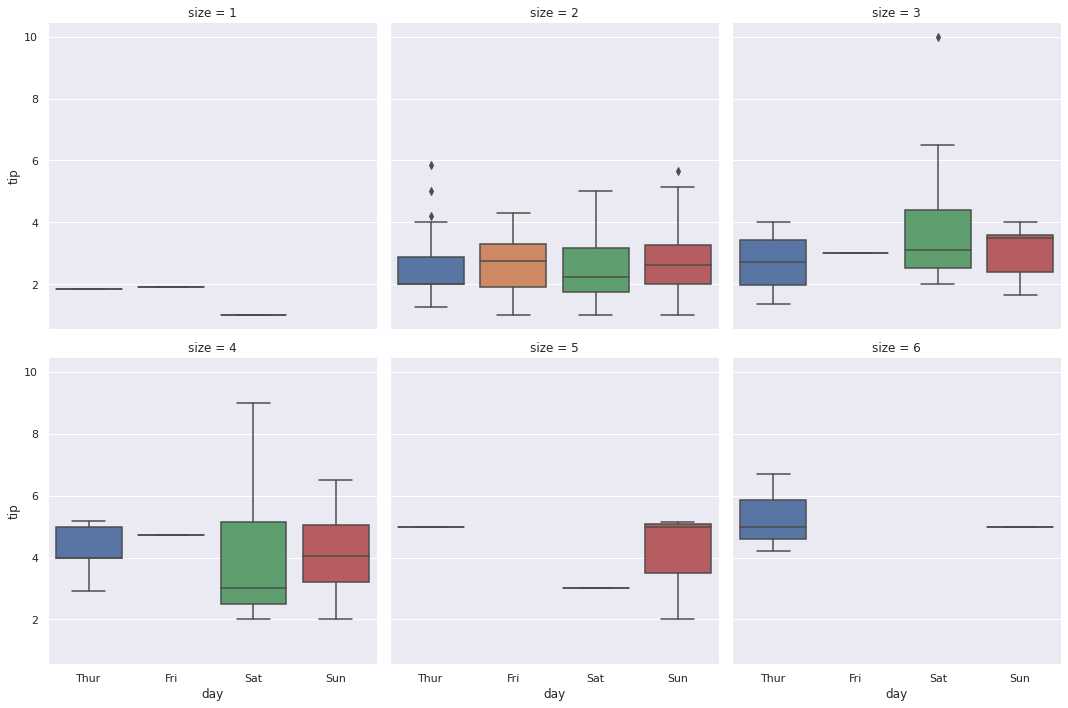

In [32]:
sns.catplot(x = "day", y = "tip", data = tips, kind = "box", col = "size", col_wrap = 3);

En la visualización anterior se ha recurrido a mostrar las gráficas con un máximo de tres por fila usando el parámetro **col_wrap** ya visto.

Y nada nos impide utilizar esta función con una única variable, mostrándose su distribución:

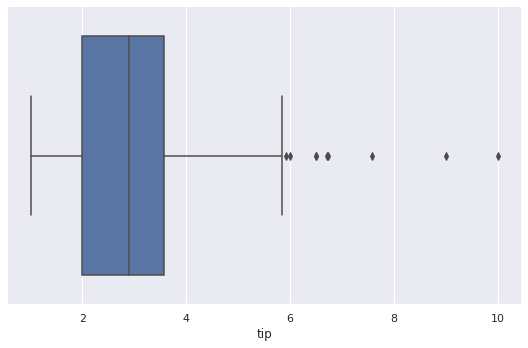

In [33]:
sns.catplot(x = "tip", data = tips, kind = "box", aspect = 1.5);

### Boxen plot
Este tipo de gráficas, obtenibles con el argumento **kind = "boxen"** de la función [seaborn.catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html) o con la función a nivel de ejes [seaborn.boxenplot](https://seaborn.pydata.org/generated/seaborn.boxenplot.html), es semejante a las box plots vistas, con la diferencia de que éstas muestran un mayor número de cuantiles, lo que supone mayor información transmitida a costa de incrementar algo la complejidad de la gráfica.



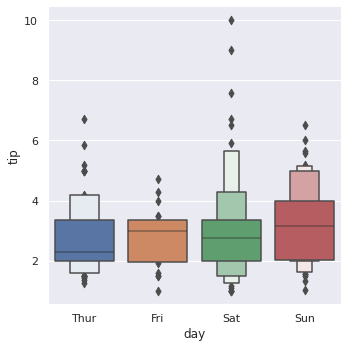

In [34]:
sns.catplot(x = "day", y = "tip", data = tips, kind = "boxen");

También podemos recurrir al parámetro hue para añadir una nueva dimensión, lo que se traduce en la creación de nuevos bloques de cajas para cada valor de la variable categórica de segmentación:

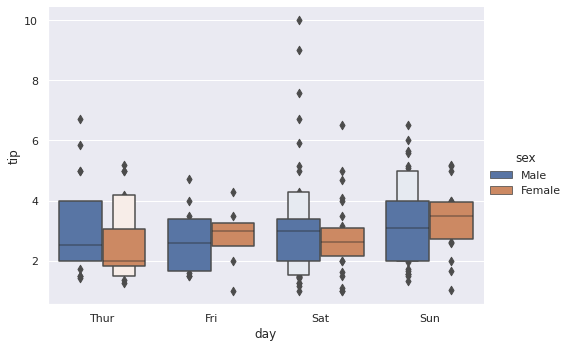

In [35]:
sns.catplot(x = "day", y = "tip", data = tips, kind = "boxen", hue = "sex", aspect = 1.4);

Si, por último, aplicamos esta función a una única variable, obtenemos una visualización de su distribución:

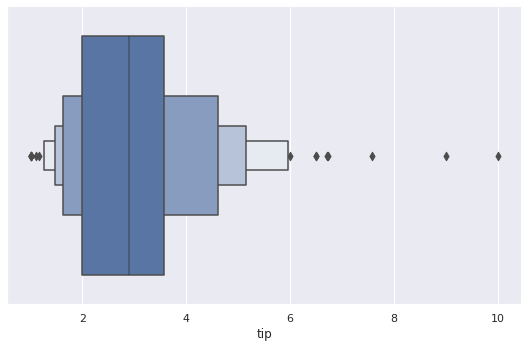

In [36]:
sns.catplot(x = "tip", data = tips, kind = "boxen", aspect = 1.5);

### Violin plot
El violin plot combina la funcionalidad del **box plot** -mostrando los cuartiles de la distribución- y la de la estimación de densidad kernel. Para crearla podemos recurrir a la función a nivel de figura seaborn.catplot con el argumento **kind = "violin"** o a la función a nivel de ejes [seaborn.violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html). Ésta es una forma muy atractiva de mostrar la distribución de un conjunto de datos con respecto a una variable categórica, pero ten en cuenta que, para conjuntos de datos pequeños, la estimación de densidad kernel puede no transmitir con detalle el perfil real de los datos, mostrándolo mucho más suave de lo que realmente es:

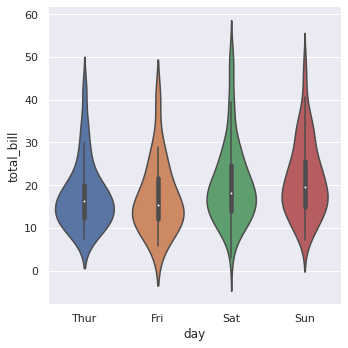

In [37]:
sns.catplot(x = "day", y = "total_bill", data = tips, kind = "violin");

Seguimos viendo la caja -ahora reducida a una linea negra de cierto grosos en el centro de cada "violín". En el interior de la línea vemos un pequeño punto blanco que representa la mediana y, lógicamente, los límites de la línea más gruesa representan los cuartiles Q1 y Q3.

En el ejemplo visto, la gráfica se ha mostrado vertical pues hemos dado como primer argumento la variable categórica. Basta intercambiar los dos primeros argumentos para cambiar la forma de la gráfica:



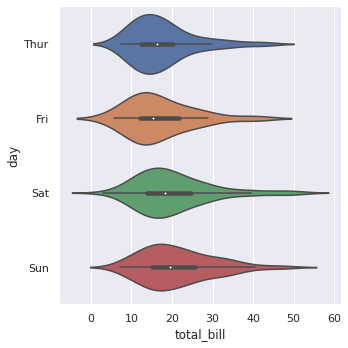

In [38]:
sns.catplot(x = "total_bill", y = "day", data = tips, kind = "violin");

Los parámetros disponibles en este tipo de gráficas proceden del enfoque "box plot" y del enfoque "kde". Así, podemos determinar el **"bandwidth"** que vimos en la gráfica kdeplot usando el parámetro **bw**. Este parámetro controlaba el grado de ajuste de la KDE a los datos:

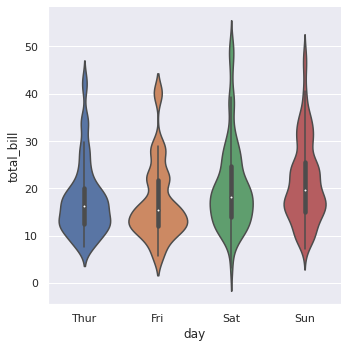

In [39]:
sns.catplot(x = "day", y = "total_bill", data = tips, kind = "violin", bw = 0.25);

El parámetro **hue** nos permite, aquí también, crear nuevos violines para cada uno de los valores de la variable categórica que se indique:

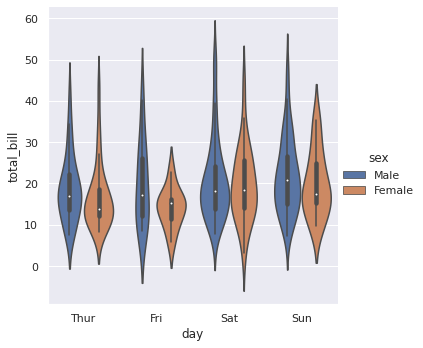

In [40]:
sns.catplot(x = "day", y = "total_bill", data = tips, kind = "violin", hue = "sex");

Al utilizar el parámetro hue para establecer un criterio de segmentación, cuando éste toma solo dos valores -como en el ejemplo anterior-, es posible agregar el parámetro **split** con el valor **True** para, en lugar de duplicar los violines, separar cada uno en dos mitades mostrando la distribución de los datos para cada valor de la variable categórica. Es decir, la gráfica anterior es semejante a la siguiente:

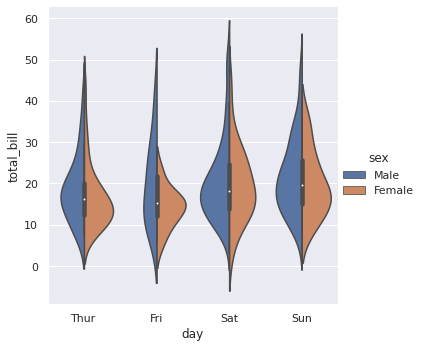

In [41]:
sns.catplot(x = "day", y = "total_bill", data = tips, kind = "violin", hue = "sex", split = True);

Si la variable categórica usada tomase más de dos valores, la función devolvería un error.

Por último, es necesario comentar que el interior del violín puede ser personalizado utilizando el parámetro inner, parámetro que puede tomar los valores **“box”, “quartile”, “point”, “stick” o None**. El valor por defecto es **"box"**, pero cambiándolo a **"quartile"**, por ejemplo, se muestran líneas horizontales señalando la posición de los cuartiles. Se muestra a continuación el resultado de utilizar las cuatro opciones comentadas usando la función equivalente **seaborn.violinplot**:

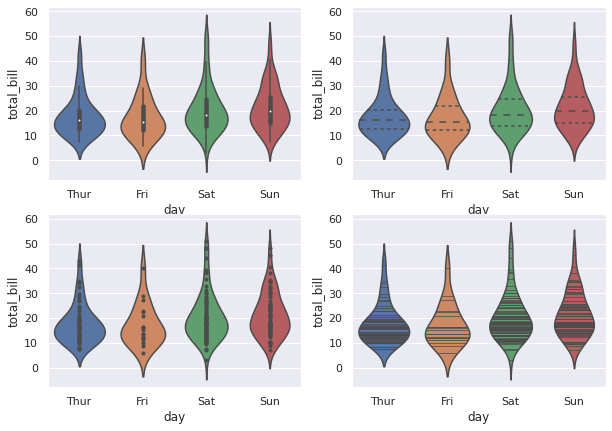

In [42]:
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(10, 7)
sns.violinplot(x = "day", y = "total_bill", data = tips, kind = "violin", inner = "box", ax = ax[0, 0]);
sns.violinplot(x = "day", y = "total_bill", data = tips, kind = "violin", inner = "quartile", ax = ax[0, 1]);
sns.violinplot(x = "day", y = "total_bill", data = tips, kind = "violin", inner = "point", ax = ax[1, 0]);
sns.violinplot(x = "day", y = "total_bill", data = tips, kind = "violin", inner = "stick", ax = ax[1, 1]);

La opción **inner = None** simplemente oculta la caja en el interior de cada violín.

## Gráficas de estimación categórica
En ciertos casos, lo que nos interesa no es visualizar la distribución de una o más variables sino calcular una medida de tendencia central para cada uno de los bloque de datos resultantes de segmentar el conjunto de datos inicial según una variable cualitativa. Entre estas medidas de tendencia central típicamente encontramos **la media aritmética**, **la media**, **la moda**, etc. Dentro de esta familia de funciones se incluyen tres: **el gráfico de barras** -disponible en dos "sabores" y el **point plot**.

### Bar plot
La función a nivel de figura seaborn.catplot con el argumento **kind = "bar"** o la función a nivel de ejes seaborn.barplot generan gráficos de barras que tienen un comportamiento ligeramente diferente al habitual: normalmente un gráfico de barras muestra el recuento de valores en cada categoría. Aun cuando esta funcionalidad también está contemplada en seaborn, las funciones mencionadas van mucho más allá de un simple recuento: aplican una función que calcula una medida de tendencia central (por defecto es el valor medio) y muestran, aplicando bootstrapping, el intervalo de confianza del 95% para dicha medida.

Veamos un sencillo ejemplo. En la siguiente gráfica mostramos el valor medio de supervivencia para hombres y mujeres en el Titanic:

In [43]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


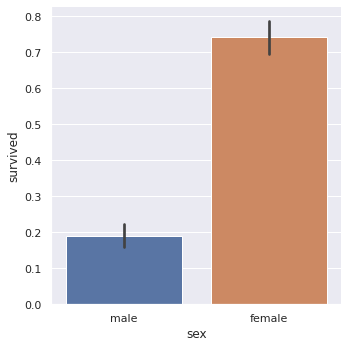

In [44]:
sns.catplot(x = "sex", y = "survived", kind = "bar", data = titanic);

Vemos en la parte superior de cada barra el intervalo del 95% de confianza para la medida de tendencia central calculada.

Tal y como ocurría con los gráficos de líneas con agregación, el parámetro **ci (confidence interval)** controla esta opción:

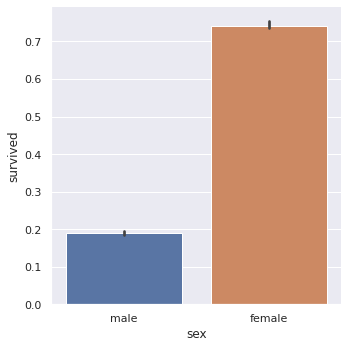

In [45]:
sns.catplot(x = "sex", y = "survived", kind = "bar", data = titanic, ci = 30);

Pasando el valor None al parámetro ci simplemente desactivamos el intervalo de confianza.

Podemos recurrir al parámetro hue para dividir cada gráfica según los valores de una nueva variable categórica, aumentando el número de dimensiones mostradas en la gráfica. Por ejemplo, se muestra a continuación la gráfica anterior tras segmentar cada una de las dos barras según la categoría del camarote:

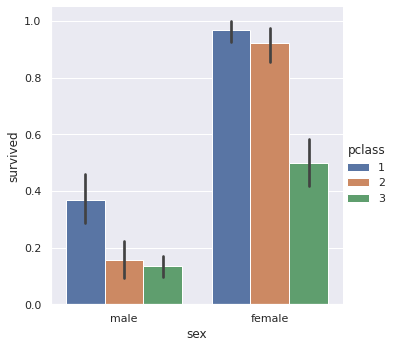

In [46]:
sns.catplot(x = "sex", y = "survived", kind = "bar", data = titanic, hue = "pclass");

Podemos mostrar la gráfica en vertical o en horizontal dando como primer argumento la variable categórica o la variable cuantitativa:

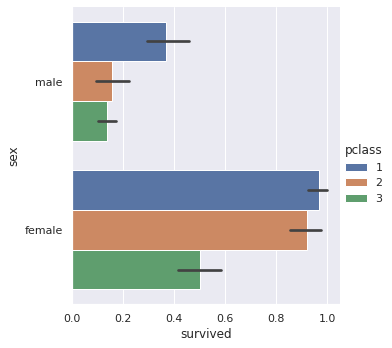

In [47]:
sns.catplot(x = "survived", y = "sex", kind = "bar", data = titanic, hue = "pclass");

En el caso de que seaborn no sea capaz de inferir cuál es la variable categórica, siempre es posible establecer el valor del parámetro **orient**.

Podemos determinar la función a utilizar con el parámetro **estimator**. En el siguiente ejemplo, mostramos en la gráfica de barras la desviación estándar de los valores que definen si el pasajero en cuestión sobrevivió o no:

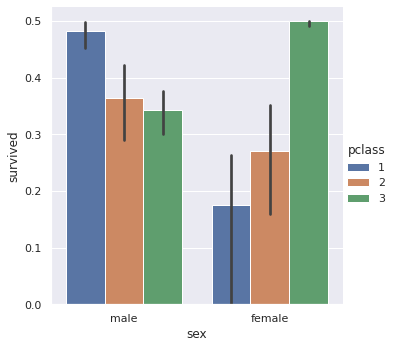

In [48]:
sns.catplot(x = "sex", y = "survived", kind = "bar", data = titanic, hue = "pclass", estimator = np.std);

### Count plot
Un caso concreto del gráfico de barras -y el más frecuente, por otro lado- es aquel en el que queremos que la longitud de la barra sea proporcional al número de elementos representado por ella. En seaborn podemos conseguir esta funcionalidad con la función a nivel de figura seaborn.catplot con el argumento **kind = "count"** o con la función a nivel de ejes [seaborn.countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html). Por ejemplo, si deseamos saber el número de propinas por día de la semana del dataset **tips**:

In [49]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


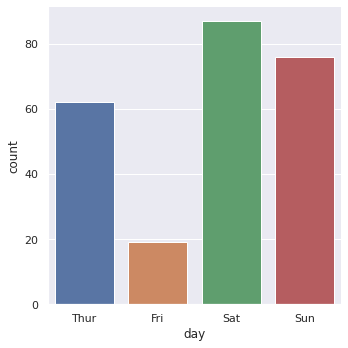

In [50]:
sns.catplot(x = "day", data = tips, kind = "count");

Sorprendentemente, seaborn no ofrece ninguna forma de mostrar las etiquetas sobre las columnas. Para esto no nos queda más remedio que calcularlas nosotros y mostrarlas haciendo uso de las herramientas de matplotlib:

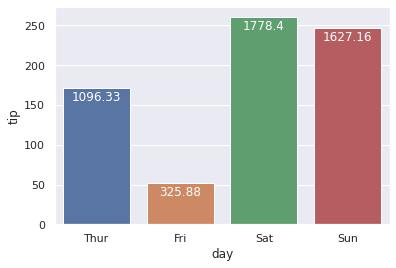

In [51]:
groupedvalues = tips.groupby('day').sum().reset_index()
g = sns.barplot(x = 'day', y = 'tip', data = groupedvalues)
for index, row in groupedvalues.iterrows():
    g.text(row.name, row.tip - 16, round(row.total_bill, 2), color = 'white', ha = "center")

Para mostrar el gráfico horizontalmente, basta indicar con el parámetro y los datos (en lugar de hacerlo con el **parámetro x**):

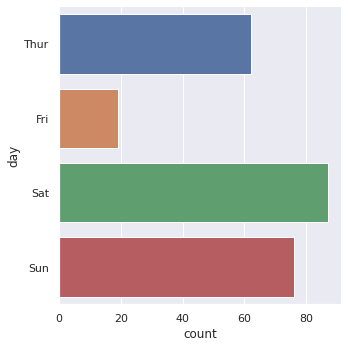

In [52]:
sns.catplot(y = "day", data = tips, kind = "count");

Podemos crear gráficos de barras agrupadas -y añadir, por lo tanto, una **dimensión adicional a la gráfica**- recurriendo al parámetro **hue**, que provoca que cada barra se multiplique por el número de valores distintos de la variable indicada por este argumento:

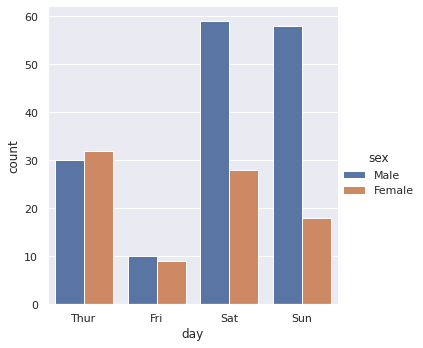

In [53]:
sns.catplot(x = "day", data = tips, kind = "count", hue = "sex");

### Point plot
Los point plots son otra alternativa a las gráficas de barras (también muestran por defecto el valor medio junto a un intervalo de confianza del 95%), pero en lugar de mostrar barras, simplemente muestra puntos a la altura adecuada y los une con una línea, reforzando el mensaje que hay detrás de la variación de un valor al siguiente. Se consiguen con la función a nivel de figura seaborn.catplot con **kind = "point"**, o con la función a nivel de ejes [seaborn.pointplot](https://seaborn.pydata.org/generated/seaborn.pointplot.html).

Por ejemplo, si deseamos mostrar la variación a lo largo de los días del valor medio de las propinas, podríamos conseguirlo con esta función:

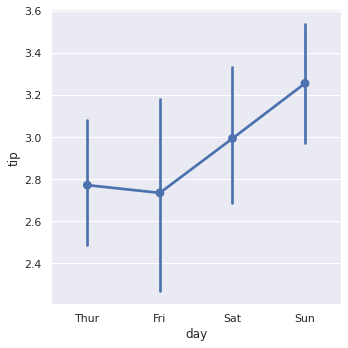

In [54]:
sns.catplot(x = "day", y = "tip", data = tips, kind = "point");

Si hacemos referencia a una nueva variable con el parámetro hue, se crean tantos conjuntos de puntos (y líneas uniéndolos) como valores tome dicha variable. En el ejemplo anterior podemos separar la línea en dos, una para cada sexo, con **hue = "sex"**:

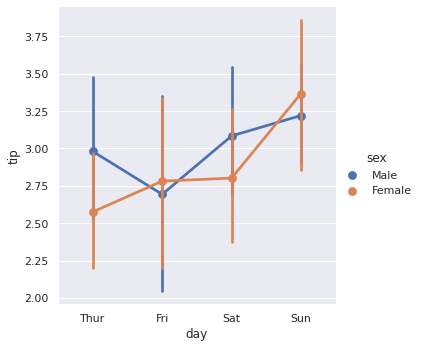

In [55]:
sns.catplot(x = "day", y = "tip", data = tips, kind = "point", hue = "sex");

Si, como en el caso anterior, las líneas verticales correspondientes al intervalo de confianza se solapan, es posible mostrar los topes de dichas líneas con el **parámetro capsize**:

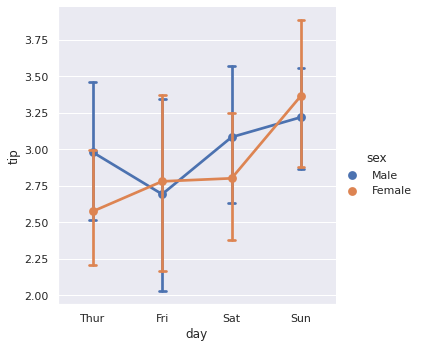

In [56]:
sns.catplot(x = "day", y = "tip", data = tips, kind = "point", hue = "sex", capsize = 0.1);

Este recurso facilita la interpretación de la longitud de las líneas en cuestión a costa de aumentar ligeramente la complejidad de la gráfica.

Como se ha comentado, por defecto se muestra el valor medio de los valores correspondientes. Esta función puede ser controlada usando el **parámetro estimator**. Y, también aquí, el parámetro ci controla el tamaño del intervalo de confianza.

Si deseamos contar el número de valores, podemos utilizar la función **len**:

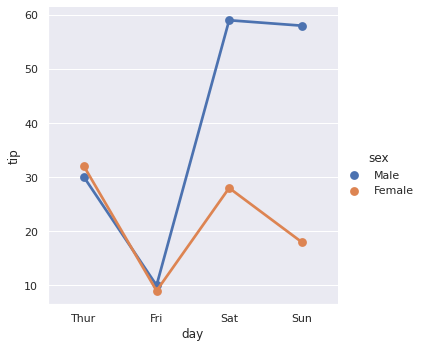

In [57]:
sns.catplot(x = "day", y = "tip", data = tips, kind = "point", hue = "sex", estimator = len);

Esta gráfica acepta parámetros como **markers** o **linestyles**, para definir los símbolos a mostrar en los puntos para los que hay datos y los estilos de las líneas, respectivamente:

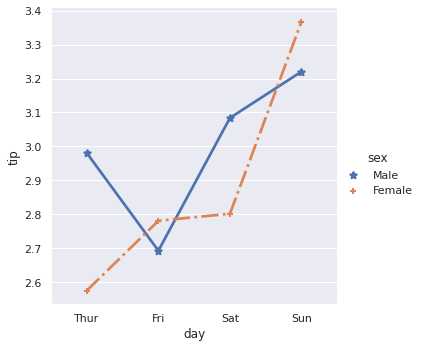

In [58]:
sns.catplot(x = "day", y = "tip", data = tips, kind = "point", hue = "sex", ci = False,
    markers = ["*", "+"], linestyles = ["-", "-."]);

Las listas de marcadores y estilos de líneas pueden ser más largas de lo necesario (en el caso de que no se conozca de antemano el número de líneas a las que se va a aplicar esta configuración).

## Modelos estadísticos
Además de ser capaces de visualizar la distribución de una o dos variables simultáneamente, o la relación entre variables cuantitativas y cualitativas, en ocasiones será también de extremada utilidad poder aplicar sencillos modelos estadísticos que pongan de manifiesto patrones en los conjuntos de datos en análisis.

seaborn ofrece una función a nivel de figura con este objetivo: [seaborn.lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html). En su forma más simple, esta función muestra un diagrama de dispersión, entrena un modelo de regresión lineal **y ~ x**, y muestra la recta de regresión resultante y el intervalo de confianza del 95% correspondiente.

La función a nivel de ejes equivalente es [seaborn.regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html), función que no incluye más que un subconjunto de la funcionalidad ofrecida por la primera.

### Regresiones lineales
Veamos un ejemplo de uso sencillo de la función seaborn.lmplot:

In [59]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


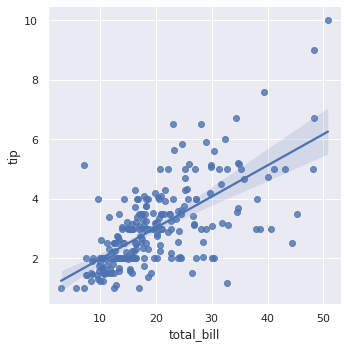

In [60]:
sns.lmplot(x = "total_bill", y = "tip", data = tips);

La función, tal y como esperábamos, ha entrenado un sencillo modelo de regresión lineal y ha mostrado la recta de regresión y el intervalo de confianza del 95%. Todo esto nos permite tener una idea más clara de la relación entre las variables en análisis.

Podemos utilizar el **parámetro hue** para separar nuestro conjunto de datos según los valores que tome una variable categórica, y mostrar los puntos correspondientes a cada grupo con colores distintos y con una recta de regresión para cada uno de ellos:

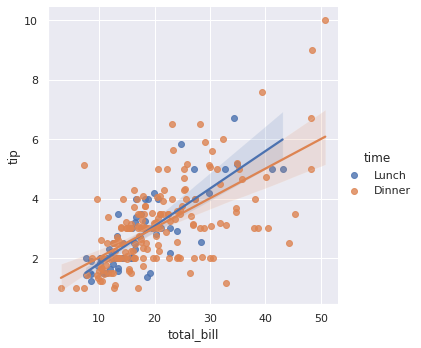

In [61]:
sns.lmplot(x = "total_bill", y = "tip", data = tips, hue = "time");

Podemos añadir una dimensión adicional mediante el uso de facets:

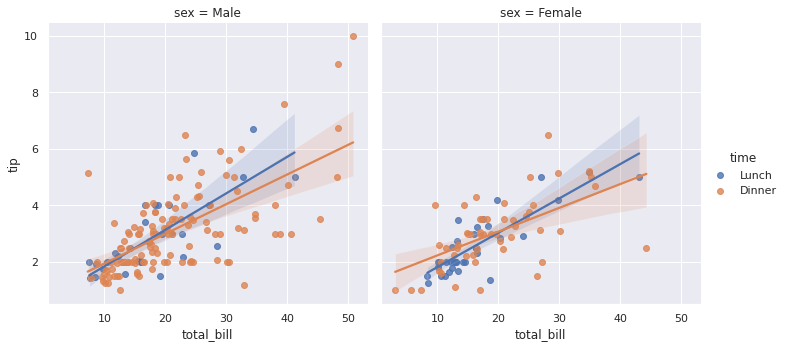

In [62]:
sns.lmplot(x = "total_bill", y = "tip", data = tips, hue = "time", col = "sex");

...e incluso dos dimensiones adicionales mostrando un criterio de segmentación en columnas y otro en filas:

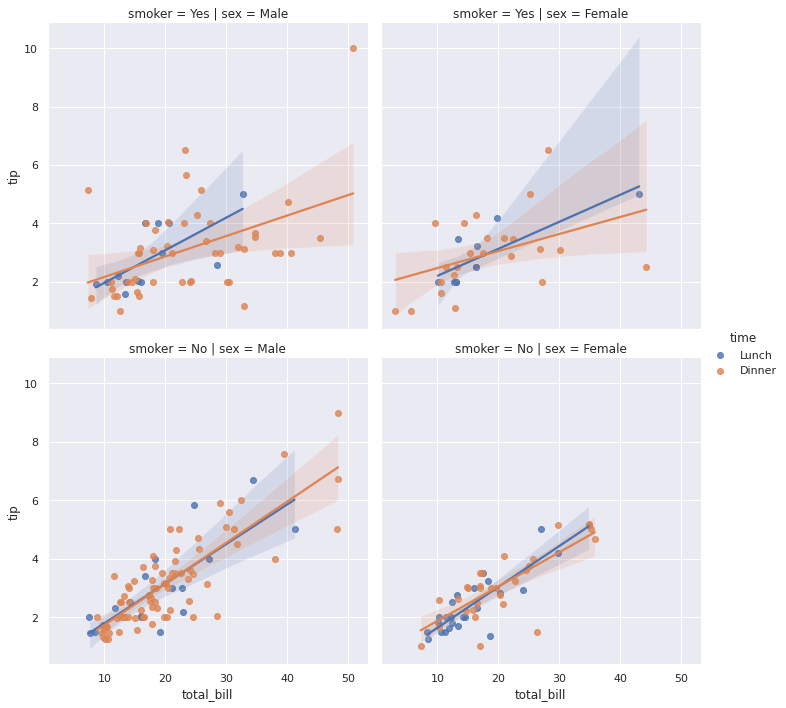

In [63]:
sns.lmplot(x = "total_bill", y = "tip", data = tips, hue = "time", col = "sex", row = "smoker");

Como ya sabemos, en el uso de facets estamos un tanto limitados por la cardinalidad de las variables involucradas: si es excesivamente alta, el número de **"facets" (gráficas)** a generar haría que éstas se mostrasen demasiado pequeñas. Si solo estamos haciendo uso de facets en columnas, podemos limitar el número de columnas con el **parámetro col_wrap**:

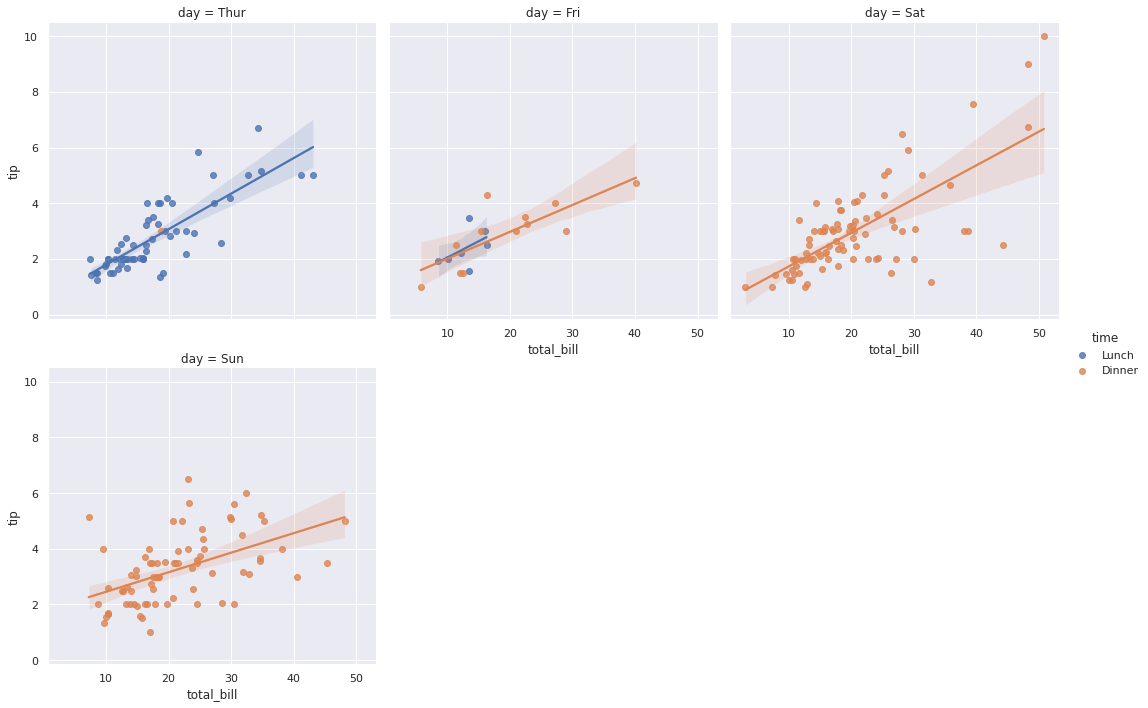

In [64]:
sns.lmplot(x = "total_bill", y = "tip", data = tips, hue = "time", col = "day", col_wrap = 3);

### Visualización de valores residuales
Una función que puede resultar muy útil es [seaborn.residplot](https://seaborn.pydata.org/generated/seaborn.residplot.html). Esta función -a nivel de ejes- entrena el modelo de regresión lineal y muestra en la gráfica los valores residuales para cada una de las observaciones. Para ver un ejemplo, comencemos cargando el conjunto de datos tips:

In [ ]:
tips = sns.load_dataset("tips")

Ahora entrenemos y mostremos el modelo de regresión lineal:

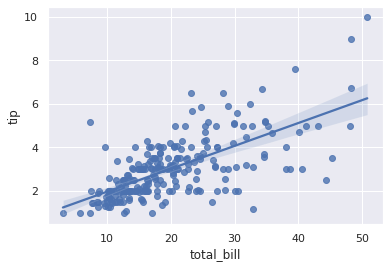

In [65]:
sns.regplot(x = "total_bill", y = "tip", data = tips);

Y mostremos los valores residuales usando la función seaborn.residplot:

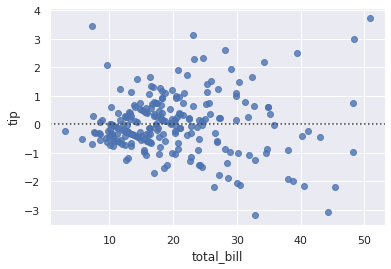

In [66]:
sns.residplot(x = "total_bill", y = "tip", data = tips);

Vemos que la función ha situado la recta de regresión horizontalmente y muestra el punto correspondiente a cada observación a la distancia que lo separa de dicha recta.

### Regresiones polinomiales
A pesar del nombre de la función **(lmplot = linear model plot)**, también es posible utilizarla para entrenar un modelo de regresión polinomial, lo que se consigue añadiendo el **parámetro order** y estableciéndolo al orden del polinomio deseado. Si este parámetro toma el valor 2 o superior, la función **sns.lmplot** ejecuta la función **numpy.polyfit** para estimar el modelo:

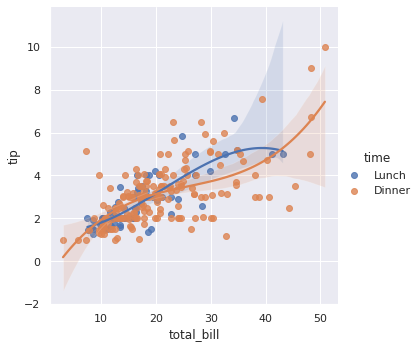

In [67]:
sns.lmplot(x = "total_bill", y = "tip", data = tips, hue = "time", order = 3);

### Regresiones logísticas
La regresión logística es un tipo de análisis utilizado para **predecir el resultado de una variable categórica** en función de un **conjunto de variables independientes**. Puede obtenerse en seaborn añadiendo el argumento **logistic = True** a la función seaborn.lmplot (o a seaborn.regplot). Para que funcione, la variable a situar en el eje y deberá ser binaria, en cuyo caso seaborn usará statsmodels para la estimación del modelo.

Por ejemplo supongamos que deseamos saber la probabilidad de que el comensal que deja la propina sea un hombre en función del total de la cuenta. Comenzamos cargando el dataset tips y añadiendo una nueva característica binaria indicando si el comensal es o no hombre:

In [68]:
tips = sns.load_dataset("tips")
tips["is_male"] = tips["sex"] == "Male"
tips.head()

,total_bill,tip,sex,smoker,day,time,size,is_male
0,16.99,1.01,Female,No,Sun,Dinner,2,False
1,10.34,1.66,Male,No,Sun,Dinner,3,True
2,21.01,3.50,Male,No,Sun,Dinner,3,True
3,23.68,3.31,Male,No,Sun,Dinner,2,True
4,24.59,3.61,Female,No,Sun,Dinner,4,False


A continuación ejecutamos la función seaborn.lmplot mostrando en el eje y el campo creado, is_male, y añadiendo el argumento **logistic = True**:

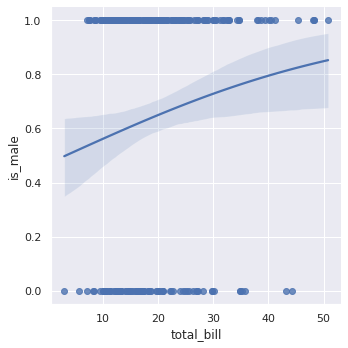

In [69]:
sns.lmplot(x = "total_bill", y = "is_male", data = tips, logistic = True);

La función muestra la regresión logística buscada y el intervalo de confianza.

Vemos cómo se han representado los puntos correspondientes a los valores **False y True** (interpretados como 0 y 1, respectivamente), pero los puntos están tan próximos unos a otros que resulta difícil distinguirlos. Las funciones sns.lmplot y sns.regplot admiten dos parámetros que pueden ser de utilidad en casos como éste: **x_jitter e y_jitter**. El primero añade un cierto **"temblor"** horizontal a los puntos, y el segundo un cierto temblor vertical. Si repetimos la visualización anterior añadiendo el argumento y_jitter, el resultado es el siguiente:

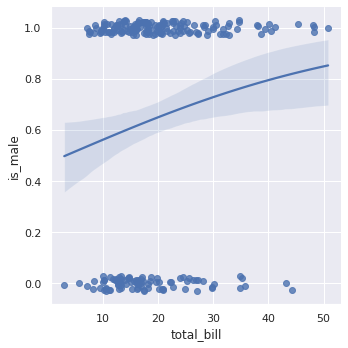

In [70]:
sns.lmplot(x = "total_bill", y = "is_male", data = tips, logistic = True, y_jitter = 0.03);

### Regresiones en otros contextos
No solo podemos mostrar rectas de regresión con las funciones vistas **seaborn.lmplot** y **seaborn.regplot**. También es posible añadirlas a otras funciones:

#### `seaborn.jointplot`
Esta función, como ya sabemos, muestra, por defecto, un diagrama de dispersión de dos variables e histogramas para cada una de ellas. Pues bien, añadiendo el argumento **kind = "reg"** conseguimos que se entrene un modelo lineal para dichas variables y se muestre en la gráfica:

In [ ]:
tips = sns.load_dataset("tips")

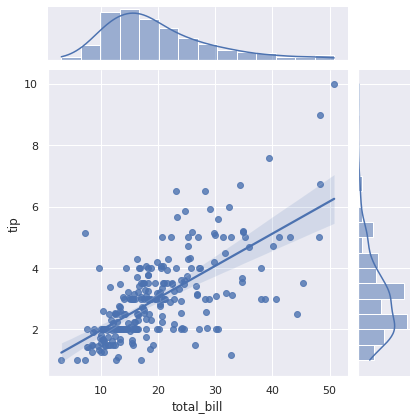

In [71]:
sns.jointplot(x = "total_bill", y = "tip", data = tips, kind = "reg");

#### `seaborn.pairplot`
En esta función, el uso del mismo argumento, **kind = "reg"**, genera rectas de regresión en todos los diagramas de dispersión de la visualización. Si, como en el siguiente ejemplo, se están dividiendo los datos según alguna variable categórica mediante el uso del parámetro **hue**, se genera una **recta de regresión para cada grupo de datos**:

In [72]:
iris = sns.load_dataset("iris")

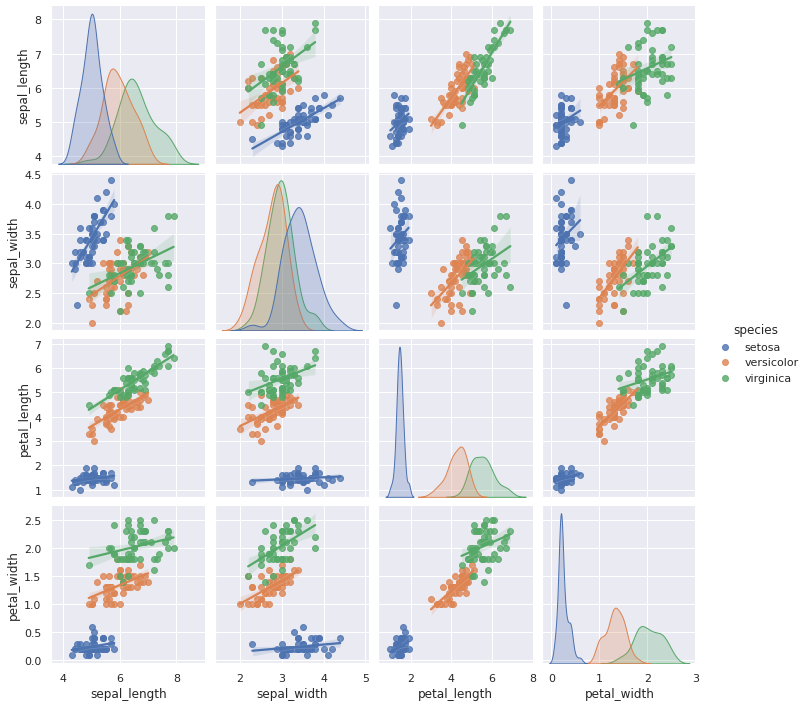

In [73]:
sns.pairplot(data = iris, hue = "species", kind = "reg");

## Mapas de calor
seaborn ofrece la función a nivel de ejes [seaborn.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) para la generación de mapas de calor. En su forma más simple, tan solo requiere como argumento de entrada un **bloque de valores de dos dimensiones**, valores que serán representados por la paleta de colores escogida. Si este bloque es un **dataframe**, las etiquetas de filas y columnas se mostrarán como etiquetas en el mapa de calor.

Veamos un ejemplo: vamos a generar unos supuestos datos de ventas mensuales para los años 2009-2018:

In [74]:
ventas = pd.DataFrame(
    np.random.randint(1, 100, 120).reshape(12, 10),
    columns = np.arange(2009, 2019),
    index = ["ene", "feb", "mar", "abr", "may", "jun", "jul", "ago", "sep", "oct", "nov", "dic"]
)
ventas

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
ene,12,71,96,7,58,3,15,94,12,11
feb,9,7,25,23,94,60,96,69,66,9
mar,59,75,31,20,53,46,89,42,27,78
abr,2,55,30,85,53,79,23,33,97,34
may,12,6,99,94,62,97,30,86,44,96
jun,33,97,59,40,77,81,61,58,97,69
jul,54,49,62,18,78,54,95,66,9,71
ago,12,83,42,61,26,16,65,10,30,18
sep,34,66,21,17,20,95,52,54,80,35
oct,85,61,57,75,20,20,84,40,7,90


Ahora basta pasar esta estructura a la función:

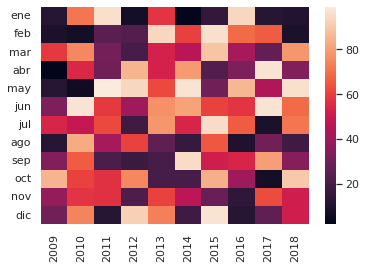

In [75]:
ax = sns.heatmap(ventas);

Podemos especificar un mapa de color con el parámetro cmap, al que podemos asignar el nombre de una paleta de colores:

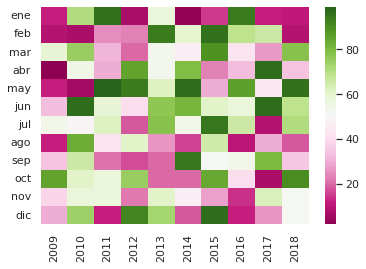

In [76]:
ax = sns.heatmap(ventas, cmap = "PiYG");

También podemos mostrar los valores en las casillas con el **parámetro annot**:

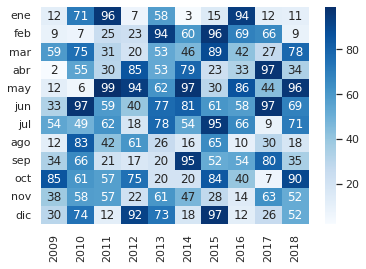

In [77]:
ax = sns.heatmap(ventas, cmap = "Blues", annot = True);

# Tamaño de las visualizaciones
Las funciones de visualización a nivel de ejes se van a crear en el eje especificado por el **atributo ax** o, si no se especifica, en el eje actual (si no existe, se crea uno en una nueva figura). Esto supone que si deseamos controlar el tamaño de estas visualizaciones, basta con definir el tamaño de la figura con las **herramientas de matplotlib**:

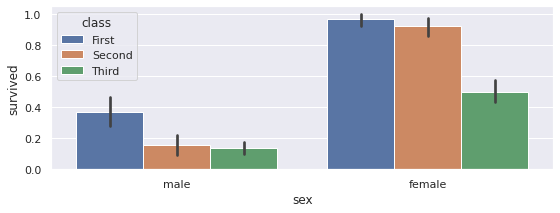

In [78]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (9, 3))
sns.barplot(x="sex", y="survived", hue="class", data=titanic, ax = ax);

Con las funciones a nivel de figura es diferente, pues ya se ha comentado que éstas crean su propia figura y los conjuntos de ejes necesarios. En estas circunstancias, el tamaño de la figura vendrá definido por el tamaño de la gráfica principal a mostrar, o por el tamaño de un facet (es decir, en el caso de mostrarse en la visualización un conjunto de gráficas -una para cada valor de una variable categórica- vendrá definida por el tamaño de cada una de ellas). El tamaño de un facet, al contrario de lo que podría esperarse, no viene determinado por parámetros como **width** o **height**, sino por su altura y razón de aspecto entre su anchura y su altura (parámetros height y aspect, respectivamente). Por ejemplo, mostremos la misma gráfica que en el ejemplo anterior utilizando la función a nivel de figura correspondiente, seaborn.catplot:

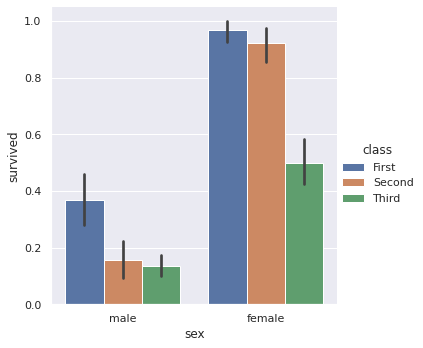

In [79]:
sns.catplot(x="sex", y="survived", hue="class", data=titanic, kind = "bar");

Se trata de una única gráfica con una relación de aspecto **1:1** (su anchura es igual a la altura). Si repetimos la visualización indicando una **altura de 3** (valor mucho menor que el valor por defecto) y una relación de **aspecto de 2** (doble anchura que altura), el resultado es el siguiente:

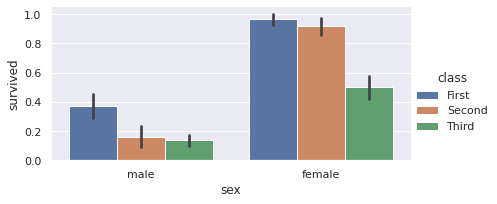

In [80]:
sns.catplot(x="sex", y="survived", hue="class", data=titanic, kind = "bar", height = 3, aspect = 2);

Repitamos la visualización usando facets:

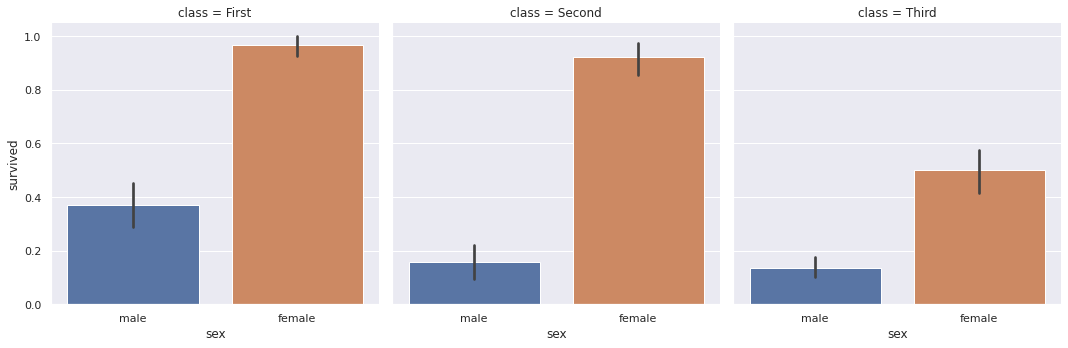

In [81]:
sns.catplot(x="sex", y="survived", col="class", data=titanic, kind = "bar");

Cada **facet** tiene un tamaño por defecto semejante al de una visualización independiente (si el número de facets a mostrar horizontalmente no obliga a que sea menor). Indiquemos ahora una **altura de 6** (algo superior a la altura por defecto) y una relación de **aspecto de 0.5** (doble altura que anchura):

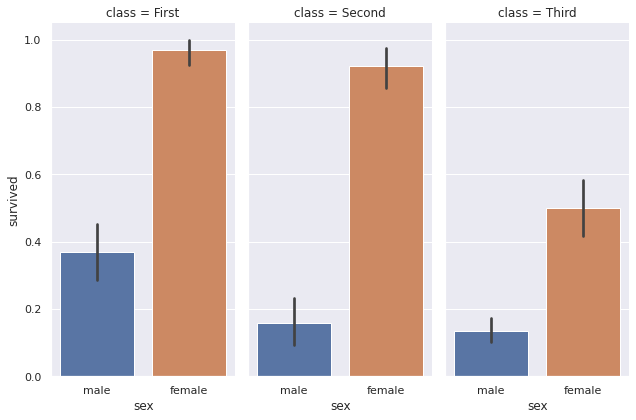

In [82]:
sns.catplot(x="sex", y="survived", col="class", data=titanic, kind = "bar", height = 6, aspect = 0.5);

En general, tendremos que jugar con estos dos valores, **height y aspect** para conseguir el tamaño deseado, teniendo en cuenta que, si estamos usando **facets**, los valores que demos a dichos parámetros harán referencia a uno de ellos.

# Colores
El color es, sin duda, la variable visual más importante, y su correcta elección puede determinar la eficacia de una visualización. seaborn incluye varias funciones para el uso y gestión de **paletas de colores**, siendo las más destacadas [seaborn.color_palette](https://seaborn.pydata.org/generated/seaborn.color_palette.html) y [seaborn.set_palette](https://seaborn.pydata.org/generated/seaborn.set_palette.html). Revisemos éstas y otras funciones relacionadas.

## Paletas discretas
La función más importante para trabajar con colores discretos es **seaborn.color_palette**. Esta función devuelve la lista de colores representada por el nombre de la paleta que se indique. Por ejemplo:

In [83]:
sns.color_palette("husl")

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.7350228985632719, 0.5952719904750953, 0.1944419133847522),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.9082572436765556, 0.40195790729656516, 0.9576909250290225)]

En este caso, la paleta **"husl" está compuesta por 6 colores**, representado cada uno por tres valores correspondientes a los canales rojo, verde y azul, que son los devueltos por la función.

Esta función acepta cualquier nombre de paleta definida en matplotlib o en seaborn. Puedes consultar un listado de paletas de matplotlib en esta página de su documentación. También acepta un número entero que indicará el número de colores a generar (si este número es mayor que el número de colores disponibles en la paleta, se repetirán cíclicamente).

La función seaborn.palplot (curiosamente, no documentada) crea una barra horizontal con los colores en cuestión:

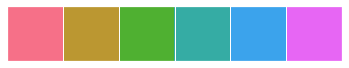

In [84]:
sns.palplot(sns.color_palette("husl"))

Muchas de las funciones de visualización que hemos visto aceptan el parámetro palette, al que podemos asignar un listado de colores como el devuelto por la función **sns.color_palettes**:

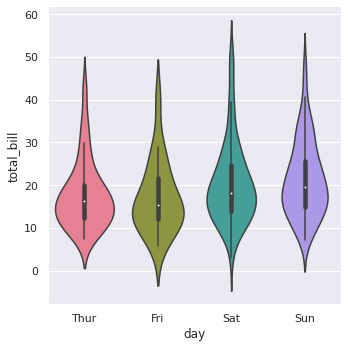

In [85]:
tips = sns.load_dataset("tips")
sns.catplot(x = "day", y = "total_bill", data = tips, kind = "violin", palette = "husl");

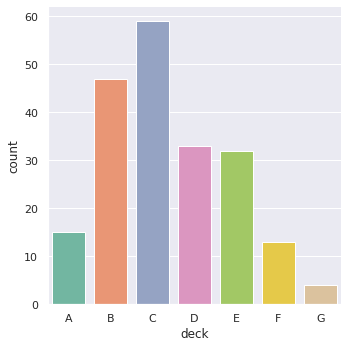

In [86]:
titanic = sns.load_dataset("titanic")
sns.catplot(x="deck", kind="count", data=titanic, palette = "Set2");

Cuando trabajemos con variables categóricas entre cuyos valores no sea posible establecer una relación de orden, es importante seleccionar colores que comuniquen esa independencia de valores, evitando, por ejemplo, gradaciones, o colores que puedan transmitir una idea de dependencia entre las distintas categorías de valores.

## Paletas secuenciales
Este tipo de paletas son apropiadas cuando existe un orden o gradación en los datos. En seaborn tenemos numerosas paletas de este tipo. Algunas llevan el nombre del color predominante:

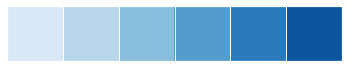

In [87]:
sns.palplot(sns.color_palette("Blues"))

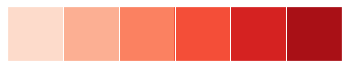

In [88]:
sns.palplot(sns.color_palette("Reds"))

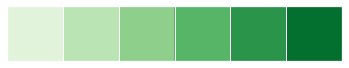

In [89]:
sns.palplot(sns.color_palette("Greens"))

Si preferimos que una paleta se muestre invertida, tal y como ocurre en matplotlib, basta con añadir "_r" al final del nombre:

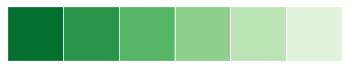

In [90]:
sns.palplot(sns.color_palette("Greens_r"))

seaborn incorpora un pequeño truco consistente en añadir el sufijo "_d" (dark) para conseguir paletas más oscuras. Compara, por ejemplo, la siguiente paleta que va de un verde a un azul:

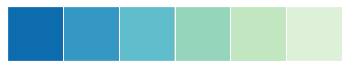

In [91]:
sns.palplot(sns.color_palette("GnBu_r"))

...con la correspondiente "oscura":

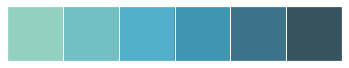

In [92]:
sns.palplot(sns.color_palette("GnBu_d"))

## Paletas divergentes
El tercer tipo de paletas es el llamado divergente. Se usan en escenarios en los que hay un orden entre los valores pero hay también un "centro" definido. Por ejemplo, alturas con respecto al nivel del mar (que pueden ser positivas, negativas o cero):

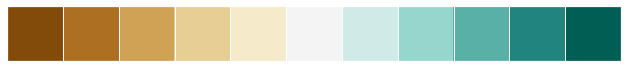

In [93]:
sns.palplot(sns.color_palette("BrBG", 11))

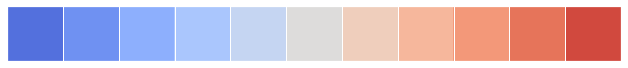

In [94]:
sns.palplot(sns.color_palette("coolwarm", 11))

## Paleta de colores por defecto
Es posible establecer una paleta de colores por defecto con la función **seaborn.set_palette**. Una vez ejecutada, la paleta en cuestión se aplicará a todas las visualizaciones que se creen a partir de ese momento:

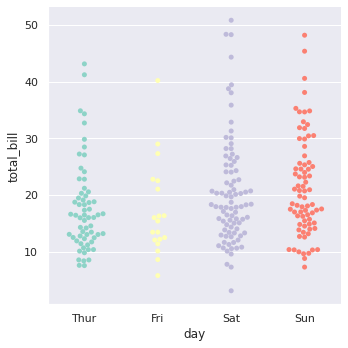

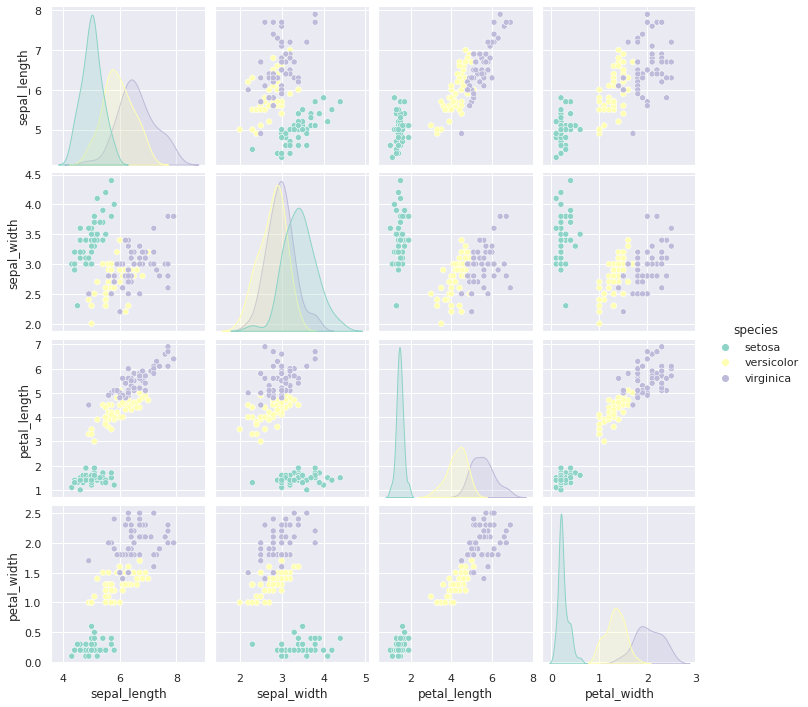

In [95]:
sns.set_palette("Set3")

tips = sns.load_dataset("tips")
sns.catplot(x = "day", y = "total_bill", kind = "swarm", data = tips);

iris = sns.load_dataset("iris")
sns.pairplot(iris, hue = "species");

## Paletas personalizadas
Tal y como hemos visto, una paleta consiste en una lista de valores correspondientes a los colores de la paleta. Estos valores pueden venir dados por tuplas de tres valores -cada uno definiendo el valor del canal rojo, verde y azul (RGB)- por su código hexadecimal o incluso por el nombre del color.

Esto nos permite crear nuestras propias paletas -por ejemplo con los colores corporativos de nuestra empresa- y aplicarlas a las visualizaciones:

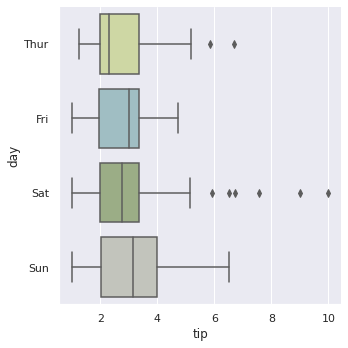

In [96]:
my_palette = ["#D4E09B", "#9AC2C9", "#9CB380", "#C2C5BB"]
sns.catplot(x = "tip", y = "day", data = tips, kind = "box", palette = my_palette);

# Estilos
Otra de las herramientas de las que disponemos para controlar el aspecto gráfico de nuestras visualizaciones son los estilos. Éstos definen el **grid**, la **fuente a utillizar**, las **marcas** de los ejes, etc.

## Estilos disponibles
seaborn incluye 5 estilos disponibles: **"darkgrid", "whitegrid", "dark", "white" y "ticks"**. La función [seaborn.set_style](https://seaborn.pydata.org/generated/seaborn.set_style.html) nos permite establecer uno como activo:

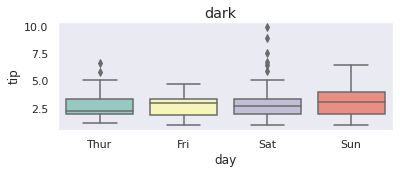

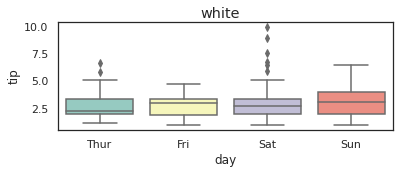

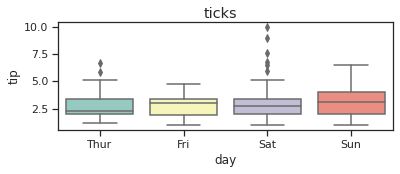

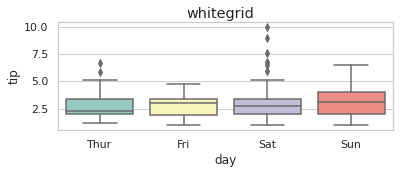

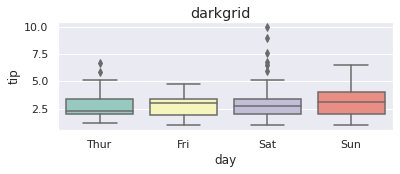

In [97]:
for i, s in enumerate(["dark", "white", "ticks", "whitegrid", "darkgrid"]):
    sns.set_style(s);
    fig = plt.figure(figsize = (6, 2))
    fig.suptitle(s)
    sns.boxplot(x = "day", y = "tip", data = tips);

## Componentes de un estilo
Un estilo viene definido por un diccionario en el que se asignan los valores adecuados a cada uno de los elementos susceptibles de ser modificados. Una vez fijado un estilo podemos ver sus componentes utilizando la función **sns.axes_style**:

In [98]:
sns.set_style("white")
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.15',
 'axes.grid': False,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.round: 'round'>,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

## Uso de estilos modificados
Es posible establecer como activo un estilo modificando alguno de sus elementos. Para ello no hay más que utilizar la función ya vista sns.set_style incluyendo como segundo argumento (tras el nombre del estilo a usar) un diccionario en el que se fijen los valores que se deseen cambiar.

Veamos un ejemplo. Partimos del estilo **"white"**:

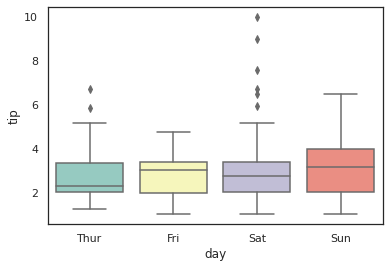

In [99]:
sns.set_style("white")
sns.boxplot(x = "day", y = "tip", data = tips);

Supongamos que queremos mostrar este mismo gráfico pero incluyendo el grid y mostrando sus líneas de color naranja. Podríamos conseguirlo de la siguiente forma:

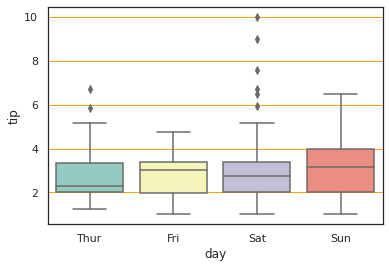

In [100]:
sns.set_style("white", {"axes.grid": True, "grid.color": "orange"})
sns.boxplot(x = "day", y = "tip", data = tips);

## Creación de estilos
Y, sabiendo que un estilo es un diccionario, podemos también crear nuestros propios estilos:

In [101]:
myStyle = {
    'axes.edgecolor': 'red',
    'axes.facecolor': 'LightCyan',
    'axes.grid': True,
    'grid.linestyle': '--',
    'ytick.right': True,
    'axes.spines.right': False,
    'axes.spines.top': False
}

Y fijarlos como activos:

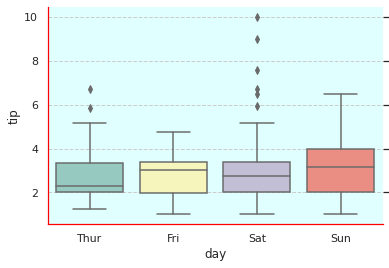

In [102]:
sns.set_style("white")
sns.set_style(myStyle)
sns.boxplot(x = "day", y = "tip", data = tips);

Los elementos del estilo a los que no demos formato se mantienen tal y como estén en ese momento. Es por ello que, en el ejemplo anterior, primero se fija el estilo "white" y después el nuestro.